In [801]:
# Import af nødvendige biblioteker:

## Datahåndtering og visualisering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Forbehandling
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

## Maskinlæring – modeller
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans

## Evaluering og modeltræning
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    silhouette_score
)


In [802]:
df = pd.read_csv("https://raw.githubusercontent.com/LukasRonberg/BIExam/refs/heads/main/data/master.csv")

In [803]:
df.shape

(27820, 12)

In [804]:
list(df)

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [805]:
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
23985,Sri Lanka,2001,male,55-74 years,671,1025106,65.46,Sri Lanka2001,NaN,"15,749,753,805",912,Silent
7121,Czech Republic,1992,male,55-74 years,394,811100,48.58,Czech Republic1992,NaN,"34,590,052,812",3573,Silent
27428,Uruguay,2004,male,15-24 years,56,253189,22.12,Uruguay2004,NaN,"13,686,329,890",4463,Millenials
4512,Brazil,2013,male,15-24 years,1317,17627508,7.47,Brazil2013,0.752,"2,472,806,919,902",13191,Millenials
7312,Czech Republic,2008,male,75+ years,137,235750,58.11,Czech Republic2008,NaN,"235,718,586,901",23811,Silent


In [806]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [807]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [808]:
# dropper hdi pga mange null values
df = df.drop('HDI for year', axis=1)

In [809]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [810]:
# Her tæller vi dubletter
df.duplicated().sum()

0

In [811]:
# Her fjerner vi mellemrum i kolonnenavne, da det kan forårsage problemer senere i koden. 
df.columns = df.columns.str.strip()

In [812]:
print(list(df.columns))


['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'gdp_for_year ($)', 'gdp_per_capita ($)', 'generation']


In [813]:
df = df.drop(columns=['country-year', 'gdp_for_year ($)', 'generation'])


In [814]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   gdp_per_capita ($)  27820 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 1.7+ MB


In [815]:
# Strip mellemrum i tekst (vigtigt!)
df["age"] = df["age"].str.strip()

# Rækkefølge for korrekt kategorisering
age_order = ['5-14 years','15-24 years','25-34 years',
             '35-54 years','55-74 years','75+ years']

# Konverter til kategorisk og kod
df["age"] = pd.Categorical(df["age"], categories=age_order, ordered=True)
df["age_encoded"] = df["age"].cat.codes


In [816]:
df[["age", "age_encoded"]].drop_duplicates().sort_values("age_encoded")


,age,age_encoded
9,5-14 years,0
0,15-24 years,1
4,25-34 years,2
1,35-54 years,3
8,55-74 years,4
3,75+ years,5


In [817]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   year                27820 non-null  int64   
 2   sex                 27820 non-null  object  
 3   age                 27820 non-null  category
 4   suicides_no         27820 non-null  int64   
 5   population          27820 non-null  int64   
 6   suicides/100k pop   27820 non-null  float64 
 7   gdp_per_capita ($)  27820 non-null  int64   
 8   age_encoded         27820 non-null  int8    
dtypes: category(1), float64(1), int64(4), int8(1), object(2)
memory usage: 1.5+ MB


In [818]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),age_encoded
0,Albania,1987,male,15-24 years,21,312900,6.71,796,1
1,Albania,1987,male,35-54 years,16,308000,5.19,796,3
2,Albania,1987,female,15-24 years,14,289700,4.83,796,1
3,Albania,1987,male,75+ years,1,21800,4.59,796,5
4,Albania,1987,male,25-34 years,9,274300,3.28,796,2


In [819]:
df["sex"] = df["sex"].str.strip().str.lower()
df['sex_numeric'] = df['sex'].map({'male': 1, 'female': 2})

In [820]:
df[["sex", "sex_numeric"]].drop_duplicates()


,sex,sex_numeric
0,male,1
2,female,2


In [821]:
# Vi opretter en mapping-dictionary, der tildeler hvert land et unikt nummer (i alfabetisk rækkefølge)
countries = sorted(df['country'].unique())
country_map = {c: i+1 for i, c in enumerate(countries)}

# Vi anvender mappingen og tilføjer en ny kolonne med landenes numeriske værdier
df['country_numeric'] = df['country'].map(country_map)

# Vi udskriver mappingen for at inspicere resultatet
print(country_map)

{'Albania': 1, 'Antigua and Barbuda': 2, 'Argentina': 3, 'Armenia': 4, 'Aruba': 5, 'Australia': 6, 'Austria': 7, 'Azerbaijan': 8, 'Bahamas': 9, 'Bahrain': 10, 'Barbados': 11, 'Belarus': 12, 'Belgium': 13, 'Belize': 14, 'Bosnia and Herzegovina': 15, 'Brazil': 16, 'Bulgaria': 17, 'Cabo Verde': 18, 'Canada': 19, 'Chile': 20, 'Colombia': 21, 'Costa Rica': 22, 'Croatia': 23, 'Cuba': 24, 'Cyprus': 25, 'Czech Republic': 26, 'Denmark': 27, 'Dominica': 28, 'Ecuador': 29, 'El Salvador': 30, 'Estonia': 31, 'Fiji': 32, 'Finland': 33, 'France': 34, 'Georgia': 35, 'Germany': 36, 'Greece': 37, 'Grenada': 38, 'Guatemala': 39, 'Guyana': 40, 'Hungary': 41, 'Iceland': 42, 'Ireland': 43, 'Israel': 44, 'Italy': 45, 'Jamaica': 46, 'Japan': 47, 'Kazakhstan': 48, 'Kiribati': 49, 'Kuwait': 50, 'Kyrgyzstan': 51, 'Latvia': 52, 'Lithuania': 53, 'Luxembourg': 54, 'Macau': 55, 'Maldives': 56, 'Malta': 57, 'Mauritius': 58, 'Mexico': 59, 'Mongolia': 60, 'Montenegro': 61, 'Netherlands': 62, 'New Zealand': 63, 'Nicarag

In [822]:
df[["country", "country_numeric"]].drop_duplicates().sort_values("country_numeric")


,country,country_numeric
0,Albania,1
264,Antigua and Barbuda,2
588,Argentina,3
960,Armenia,4
1258,Aruba,5
...,...,...
26404,United Arab Emirates,97
26476,United Kingdom,98
26848,United States,99
27220,Uruguay,100


In [823]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),age_encoded,sex_numeric,country_numeric
0,Albania,1987,male,15-24 years,21,312900,6.71,796,1,1,1
1,Albania,1987,male,35-54 years,16,308000,5.19,796,3,1,1
2,Albania,1987,female,15-24 years,14,289700,4.83,796,1,2,1
3,Albania,1987,male,75+ years,1,21800,4.59,796,5,1,1
4,Albania,1987,male,25-34 years,9,274300,3.28,796,2,1,1


In [824]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   year                27820 non-null  int64   
 2   sex                 27820 non-null  object  
 3   age                 27820 non-null  category
 4   suicides_no         27820 non-null  int64   
 5   population          27820 non-null  int64   
 6   suicides/100k pop   27820 non-null  float64 
 7   gdp_per_capita ($)  27820 non-null  int64   
 8   age_encoded         27820 non-null  int8    
 9   sex_numeric         27820 non-null  int64   
 10  country_numeric     27820 non-null  int64   
dtypes: category(1), float64(1), int64(6), int8(1), object(2)
memory usage: 2.0+ MB


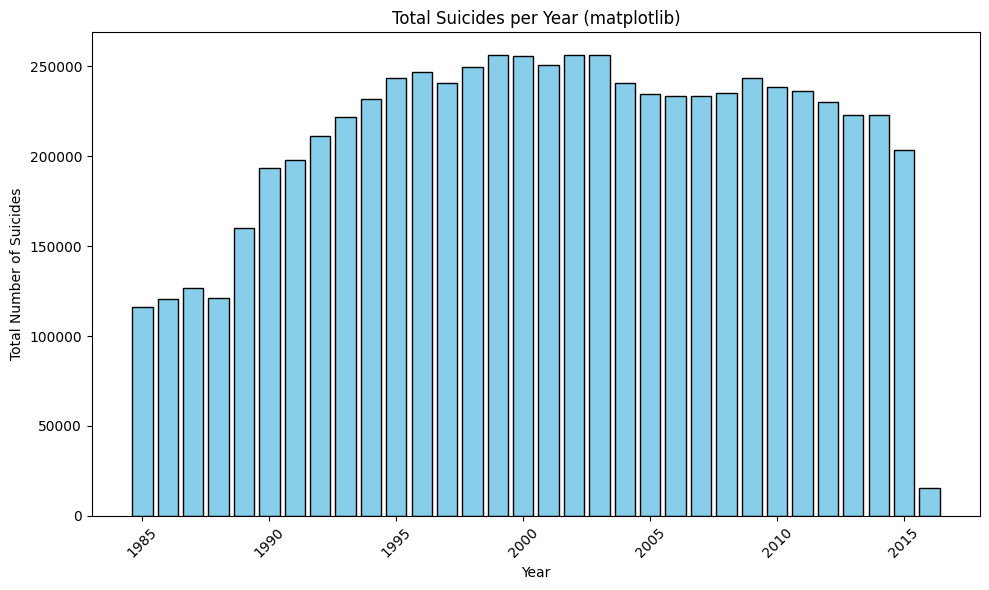

In [825]:
# Vi summerer det samlede antal selvmord pr. år
yearly = df.groupby('year', as_index=False)['suicides_no'].sum()

# Vi visualiserer udviklingen med et søjlediagram (matplotlib)
plt.figure(figsize=(10,6))
plt.bar(yearly['year'], yearly['suicides_no'], color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Total Number of Suicides')
plt.title('Total Suicides per Year (matplotlib)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [826]:
# Vi fjerner alle rows i 2016, da dataen fra det år er minimalt
df = df[df['year'] != 2016]

# Vi tjekker at kolonnen er væk
print(df['year'].unique())

[1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011]


### Analyse af Korrelationsmatrix

Vi har valgt **`suicides/100k pop`** som vores afhængige variabel, da den bedst udtrykker antallet af selvmord normaliseret pr. 100.000 indbyggere og dermed er sammenlignelig på tværs af lande og befolkninger.

Ud fra korrelationsmatricen ser vi følgende:

| Uafhængig variabel    | Korrelation med `suicides/100k pop` | Tolkning |
|-----------------------|--------------------------------------|----------|
| `age_encoded`         | **+0.36**                            | Der er en moderat positiv sammenhæng – alder har betydning. |
| `sex_numeric`         | **-0.39**                            | Der ses en tydelig forskel mellem køn – selvmordsraten er højere for mænd. |
| `gdp_per_capita ($)`  | +0.03                                | Ingen nævneværdig lineær sammenhæng. |
| `gdp_for_year`        | +0.03                                | Svag korrelation – økonomisk niveau alene forklarer ikke forskelle. |
| `population`          | +0.01                                | Ubetydelig. |
| `year`                | -0.04                                | Ingen reel sammenhæng. |
| `country_numeric`     | +0.06                                | Ikke signifikant. |

---

### Konklusion

- Vi konkluderer, at **alder (`age_encoded`) og køn (`sex_numeric`)** er de mest forklarende faktorer i forhold til selvmordsraten pr. 100.000 personer.
- Økonomiske variable og tid har ingen eller meget svag lineær sammenhæng med selvmordsraterne.
- Vores videre analyser bør fokusere på **demografiske faktorer** (alder og køn) og deres samspil.

---

### Næste skridt

- Vi vil visualisere data med fx boxplots eller interaktive grafer.
- Vi vil bygge en simpel **lineær regressionsmodel** med alder og køn som forklarende variable.



   age_encoded  suicides/100k pop          age
0            0            2858.39   5-14 years
1            1           41292.61  15-24 years
2            2           56239.60  25-34 years
3            3           68960.47  35-54 years
4            4           74513.18  55-74 years
5            5          110532.19    75+ years


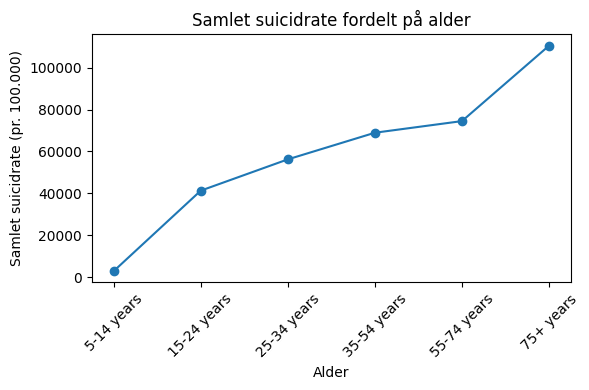

In [827]:
# Da 'age_encoded' ikke gav det forventede resultat i korrelationsanalysen, vælger vi at lave et nyt plot
# for bedre at forstå sammenhængen mellem alder og selvmordsrate

# Vi summerer selvmordsraten pr. 100.000 for hver aldersgruppe
age_totals = df.groupby('age_encoded', as_index=False)['suicides/100k pop'].sum()

# Vi mapper de oprindelige aldersbetegnelser tilbage til graffremstilling
age_totals['age'] = age_totals['age_encoded'].map(
    dict(enumerate(age_order))
)

# Vi udskriver aldersgrupperne og deres tilhørende samlede selvmordsrate
print(age_totals)

# Vi visualiserer sammenhængen mellem aldersgruppe og samlet selvmordsrate
plt.figure(figsize=(6,4))
plt.plot(age_totals['age_encoded'], age_totals['suicides/100k pop'], marker='o')
plt.xticks(age_totals['age_encoded'], age_totals['age'], rotation=45)
plt.xlabel('Alder')
plt.ylabel('Samlet suicidrate (pr. 100.000)')
plt.title('Samlet suicidrate fordelt på alder')
plt.tight_layout()
plt.show()

   sex_numeric  suicides/100k pop     sex
0            1          279767.16    Mand
1            2           74629.28  Kvinde


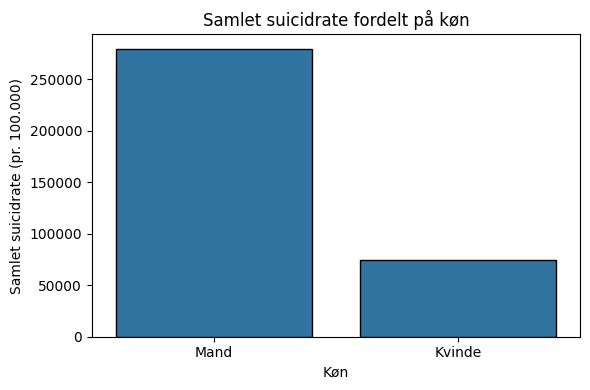

In [828]:
# 1. Vi opretter en numerisk version af køn, hvor 'male' = 1 og 'female' = 2
df['sex_numeric'] = df['sex'].map({'male': 1, 'female': 2})

# 2. Vi summerer selvmordsraten pr. 100.000 for hvert køn
sex_totals = df.groupby('sex_numeric', as_index=False)['suicides/100k pop'].sum()

# 3. Vi mapper tallene tilbage til de oprindelige kønsbetegnelser
sex_map = {1: 'Mand', 2: 'Kvinde'}
sex_totals['sex'] = sex_totals['sex_numeric'].map(sex_map)

# Vi udskriver den samlede selvmordsrate for mænd og kvinder
print(sex_totals)

# Vi visualiserer forskellen i samlet selvmordsrate mellem kønnene
plt.figure(figsize=(6, 4))
sns.barplot(data=sex_totals, x='sex', y='suicides/100k pop', edgecolor='black')
plt.xlabel('Køn')
plt.ylabel('Samlet suicidrate (pr. 100.000)')
plt.title('Samlet suicidrate fordelt på køn')
plt.tight_layout()
plt.show()



C:\Users\larsg\AppData\Local\Temp\ipykernel_27720\556689092.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_age = df.groupby(['age', 'sex'], as_index=False)['suicides/100k pop'].sum()


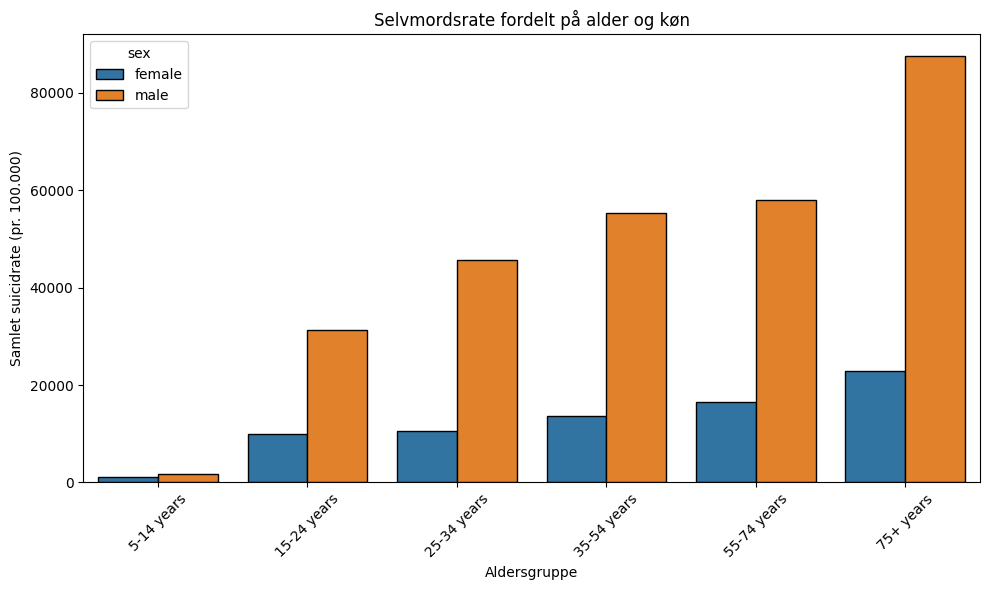

In [829]:
# Vi grupperer data efter både aldersgruppe og køn og summerer selvmordsraten pr. 100.000
sex_age = df.groupby(['age', 'sex'], as_index=False)['suicides/100k pop'].sum()

# Vi visualiserer forskellen i selvmordsrate mellem køn inden for hver aldersgruppe
plt.figure(figsize=(10, 6))
sns.barplot(data=sex_age, x='age', y='suicides/100k pop', hue='sex', edgecolor='black')
plt.xlabel('Aldersgruppe')
plt.ylabel('Samlet suicidrate (pr. 100.000)')
plt.title('Selvmordsrate fordelt på alder og køn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Suicidrater fordelt på alder og køn

Vi har nu undersøgt, hvordan selvmordsraterne (målt som `suicides/100k pop`) fordeler sig både på køn og aldersgrupper. Ved at gruppere data efter `age` og `sex` og visualisere dem i et grupperet søjlediagram, kan vi konkludere følgende:

- **Mænd har generelt en markant højere suicidrate end kvinder** i samtlige aldersgrupper.
- Den største forskel ses i aldersgruppen **75+ år**, hvor mænds suicidrate er næsten fire gange så høj som kvinders.
- Den laveste selvmordsrate ses i aldersgruppen **5-14 år**, uanset køn, hvilket er forventeligt.
- Kvinders selvmordsrate er relativt stabil på tværs af aldersgrupper, mens mænds rate stiger markant med alderen og topper i **75+ år**.

Disse resultater understreger behovet for målrettede forebyggende tiltag – især blandt ældre mænd. Det vil være oplagt at analysere yderligere faktorer såsom økonomiske forhold og geografisk placering for at opnå en mere nuanceret forståelse af mønstrene.



C:\Users\larsg\AppData\Local\Temp\ipykernel_27720\2344109219.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_totals_sorted, y='country', x='suicides/100k pop', palette='viridis')


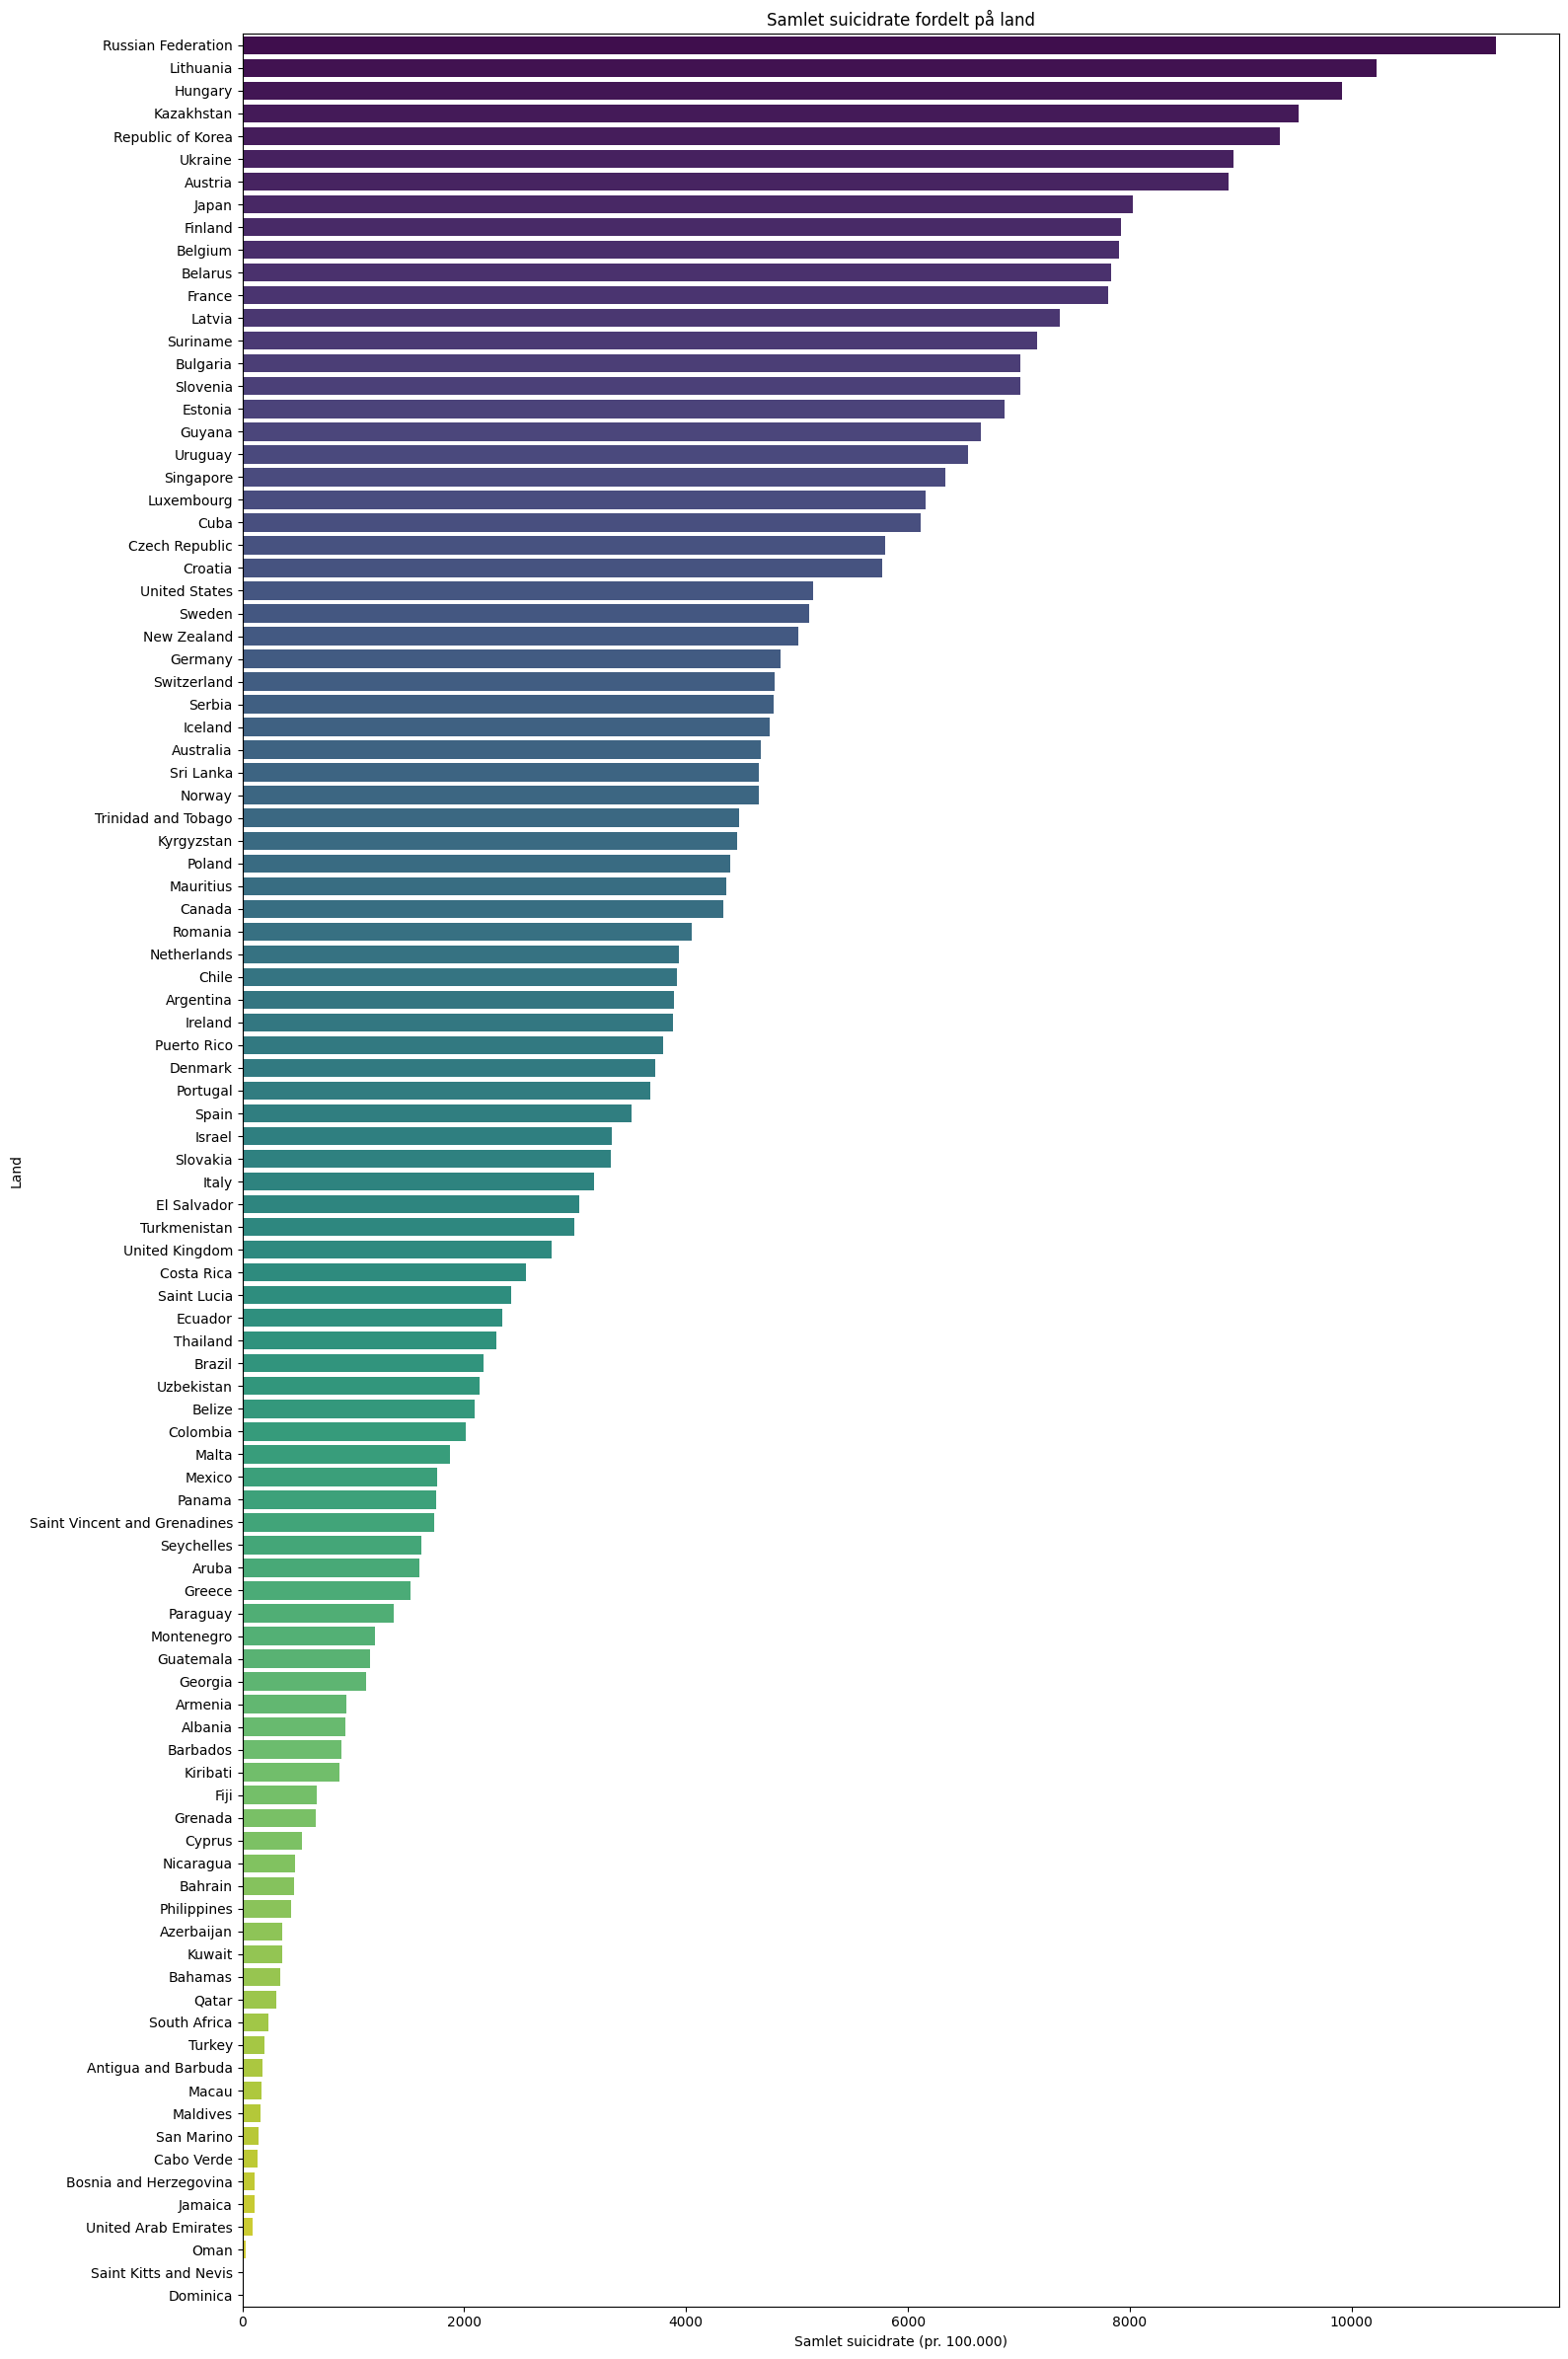

In [830]:
# Vi grupperer og summerer selvmordsraten pr. 100.000 for hvert land
country_totals = df.groupby('country', as_index=False)['suicides/100k pop'].sum()

# Vi sorterer landene efter samlet selvmordsrate i faldende rækkefølge
country_totals_sorted = country_totals.sort_values(by='suicides/100k pop', ascending=False)

# Vi visualiserer selvmordsraten pr. land
plt.figure(figsize=(16, 24))
sns.barplot(data=country_totals_sorted, y='country', x='suicides/100k pop', palette='viridis')
plt.xlabel('Samlet suicidrate (pr. 100.000)')
plt.ylabel('Land')
plt.title('Samlet suicidrate fordelt på land')
plt.tight_layout()
plt.show()



### Selvmordsrater fordelt på lande

Ved at sammenfatte den gennemsnitlige selvmordsrate (`suicides/100k pop`) pr. land og visualisere den, kan vi drage flere vigtige konklusioner:

- Der er **store forskelle mellem lande** i forhold til selvmordsrater, både i absolutte tal og i mønstre over tid.
- Nogle lande, som fx **Litauen, Rusland og Sydkorea**, udviser konsekvent høje selvmordsrater, mens andre, som fx **Grækenland og Italien**, har lavere rater.
- **Kulturelle og samfundsmæssige forskelle** synes at spille en væsentlig rolle, da lande med lignende økonomisk niveau kan have vidt forskellige selvmordsrater.

Desuden undersøgte vi, om økonomisk velstand målt i **BNP pr. indbygger (`gdp_per_capita ($)`)** havde en indflydelse på selvmordsraten. Vores korrelationsanalyse viste dog **ingen tydelig lineær sammenhæng** mellem disse to variabler. Dette indikerer, at **økonomi alene ikke er en afgørende faktor**, og at selvmordsrater snarere afhænger af et komplekst samspil af kulturelle, sociale og helbredsmæssige forhold.

Derfor anbefaler vi, at man i videre analyser overvejer at inddrage flere kvalitative faktorer samt ser på **ikke-lineære mønstre eller undergrupper** i befolkningen for at få en mere nuanceret forståelse af de bagvedliggende årsager.



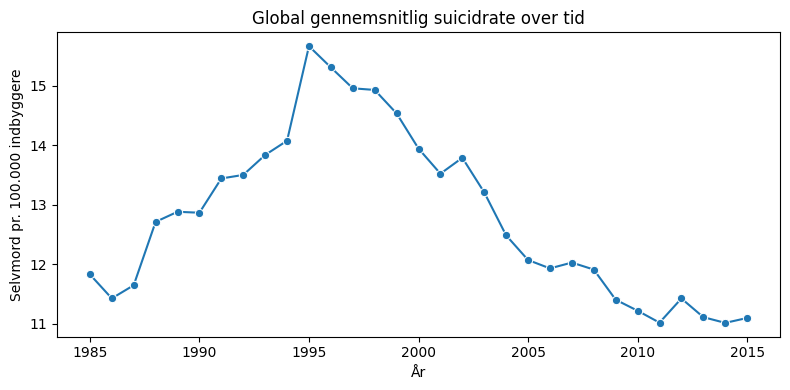

In [831]:
# Vi beregner den gennemsnitlige selvmordsrate globalt pr. år
global_trend = df.groupby('year')['suicides/100k pop'].mean().reset_index()

# Vi visualiserer den globale udvikling i selvmordsraten over tid
plt.figure(figsize=(8, 4))
sns.lineplot(data=global_trend, x='year', y='suicides/100k pop', marker='o')
plt.title('Global gennemsnitlig suicidrate over tid')
plt.ylabel('Selvmord pr. 100.000 indbyggere')
plt.xlabel('År')
plt.tight_layout()
plt.show()



### Udvikling i global selvmordsrate over tid

For at undersøge den overordnede udvikling i selvmordsraten globalt, har vi analyseret den gennemsnitlige `suicides/100k pop` pr. år. Visualiseringen viser følgende:

- Der er en **svagt faldende tendens** i den globale selvmordsrate fra midten af 1990’erne til slutningen af 2000’erne.
- Fra omkring **2010 og frem** ser raten ud til at **stabilisere** sig på et lidt lavere niveau.
- Der er dog enkelte udsving fra år til år, hvilket kan skyldes forskelle i rapportering, demografi eller økonomiske forhold.

**Konklusion**: Den globale selvmordsrate har over tid udvist en let nedadgående tendens. Dette kan indikere, at forebyggelsesindsatser eller forbedret mental sundhed i nogle regioner har haft en effekt – men variationer mellem lande gør det nødvendigt at undersøge udviklingen mere lokalt.


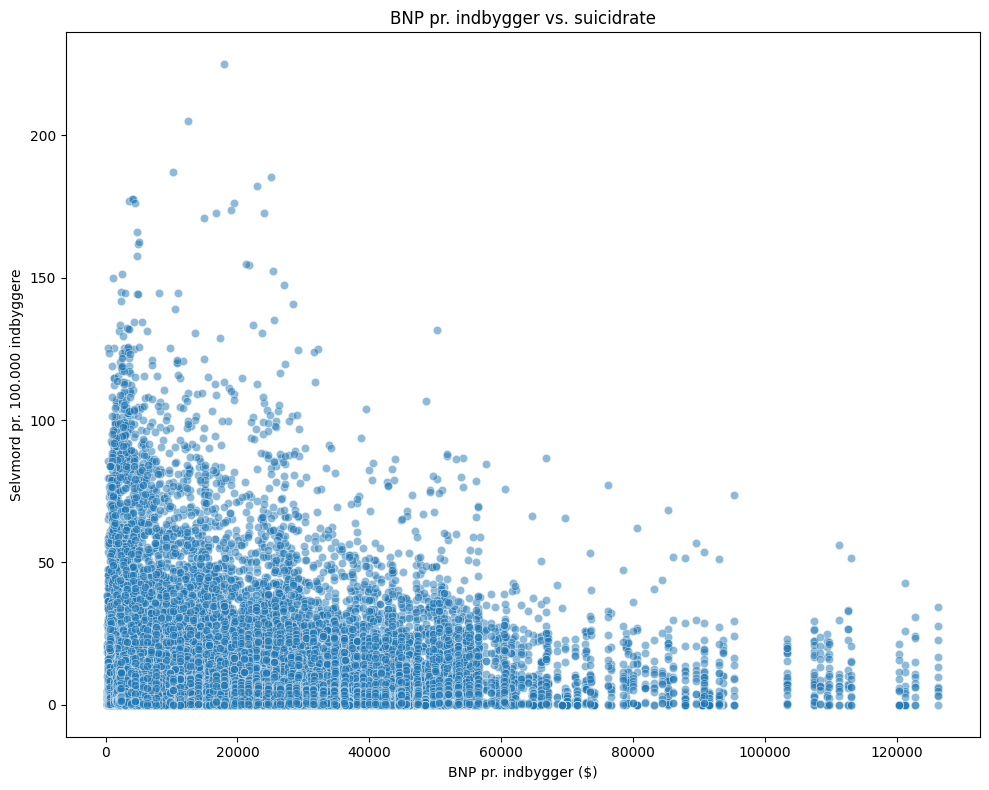

In [832]:
# Vi visualiserer sammenhængen mellem BNP pr. indbygger og selvmordsrate med et scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='gdp_per_capita ($)', y='suicides/100k pop', alpha=0.5)
plt.title('BNP pr. indbygger vs. suicidrate')
plt.xlabel('BNP pr. indbygger ($)')
plt.ylabel('Selvmord pr. 100.000 indbyggere')
plt.tight_layout()
plt.show()



### BNP pr. indbygger vs. selvmordsrate

Scatterplottet viser forholdet mellem økonomisk velstand (BNP pr. indbygger) og selvmordsraten (`suicides/100k pop`). 

- Der ses **ingen stærk lineær sammenhæng**, hvilket underbygges af korrelationsmatricen.
- Dog ses en tendens til, at **lande med lavere BNP** kan have **mere spredte og til tider højere selvmordsrater**.
- I lande med højere BNP er selvmordsraten typisk lavere og mindre spredt, men der findes undtagelser.

**Konklusion**: Økonomisk velstand ser ikke ud til alene at kunne forklare selvmordsrater på tværs af lande. Andre faktorer – såsom alder, køn, kulturelle forhold og social støtte – bør inkluderes i en mere kompleks model for at forstå variationerne bedre.


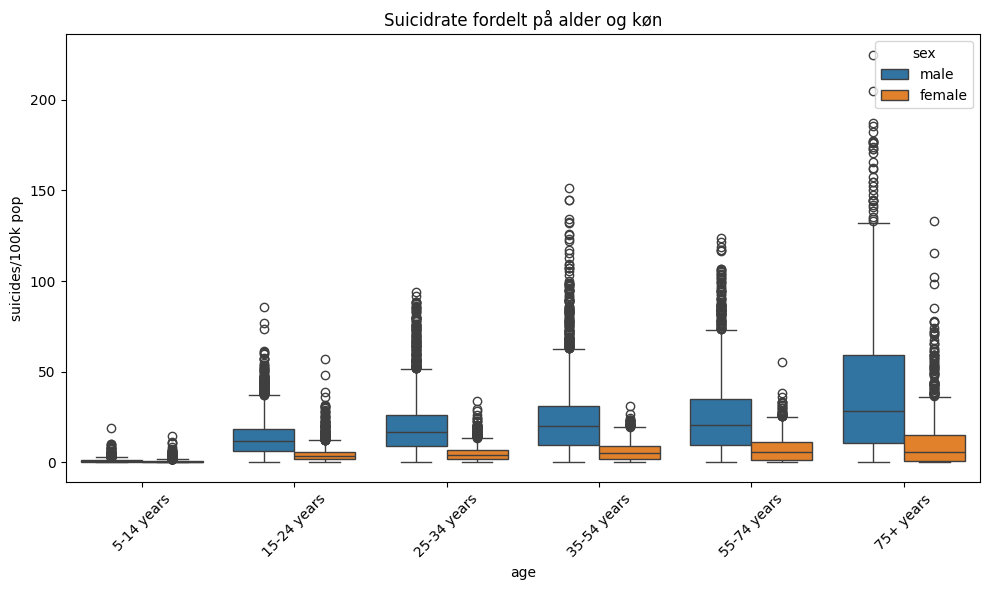

In [833]:
# Vi visualiserer fordelingen af selvmordsraten på tværs af aldersgrupper og køn med et boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age', y='suicides/100k pop', hue='sex')
plt.title('Suicidrate fordelt på alder og køn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Suicidrater fordelt på alder og køn (boxplot)

Boxplottet giver os et mere detaljeret billede af, hvordan selvmordsrater (`suicides/100k pop`) fordeler sig på tværs af både alder og køn:

- **Mænd har markant højere median-suicidrater** end kvinder i alle aldersgrupper.
- Forskellen mellem kønnene **forstærkes med alderen**, hvor den største forskel ses i **gruppen 75+ år**.
- Der er **flere ekstreme værdier (outliers)** blandt mænd, især i de ældre aldersgrupper, hvilket indikerer stor variation og enkelte lande med meget høje rater.
- Kvinders rater forbliver generelt lavere og mere stabile på tværs af aldersgrupper.

**Konklusion**: Dataen peger klart på, at alder og køn er stærkt relateret til selvmordsraten. Ældre mænd udgør den mest sårbare gruppe, hvilket bør prioriteres i forebyggende indsatser og videre analyser.


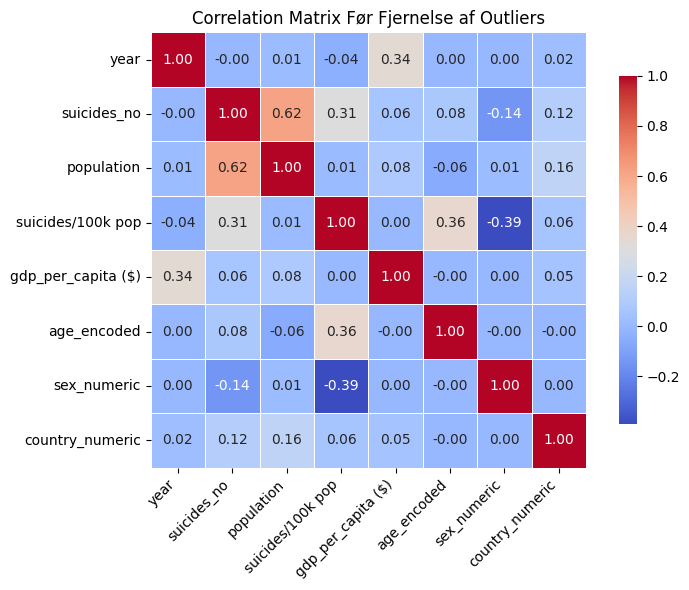

In [834]:
# Vi beregner korrelationsmatrixen for alle numeriske kolonner
corr = df.corr(numeric_only=True)

# Vi visualiserer korrelationerne med et heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix Før Fjernelse af Outliers")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

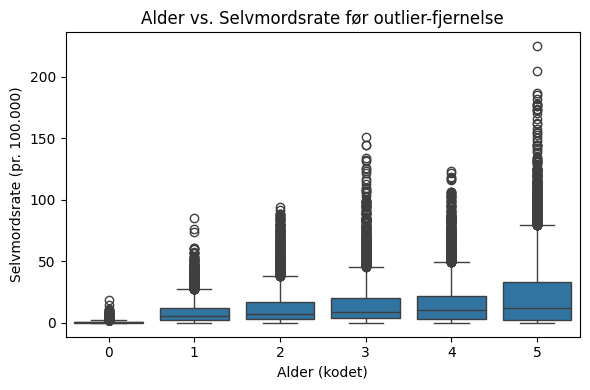

In [835]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="age_encoded", y="suicides/100k pop")
plt.title("Alder vs. Selvmordsrate før outlier-fjernelse")
plt.xlabel("Alder (kodet)")
plt.ylabel("Selvmordsrate (pr. 100.000)")
plt.tight_layout()
plt.show()

Når vi kigger på boxplottet, kan vi se, at selvmordsraten bliver højere, jo ældre folk er. De ældste aldersgrupper har både en højere gennemsnitlig rate og større forskelle mellem personer. Det tyder på, at alder har en vigtig betydning for selvmordsraten.

In [836]:
Q1 = df["suicides/100k pop"].quantile(0.25)
Q3 = df["suicides/100k pop"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_outliers = df[(df["suicides/100k pop"] >= lower) & (df["suicides/100k pop"] <= upper)]

# Vi gemmer det rensede datasæt til fil
df_no_outliers.to_csv("cleaned_suicide_data.csv", index=False)

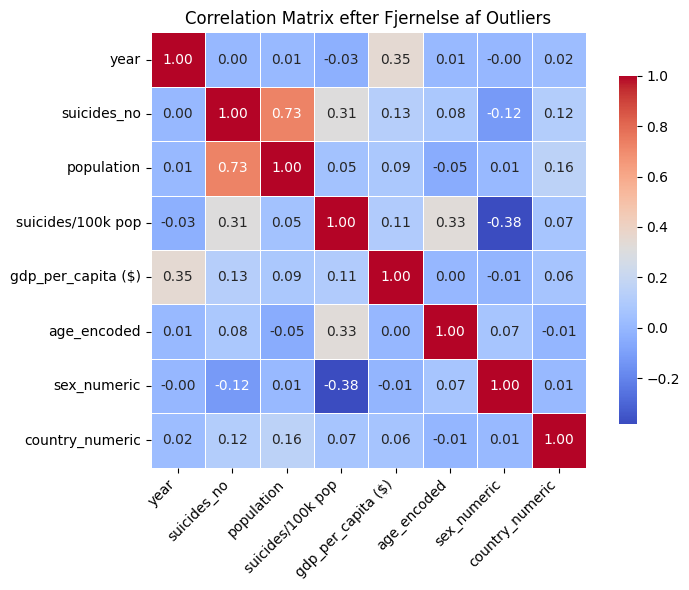

In [837]:
# Vi beregner korrelationsmatrixen for alle numeriske kolonner
corr = df_no_outliers.corr(numeric_only=True)

# Vi visualiserer korrelationerne med et heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix efter Fjernelse af Outliers")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Analyse af Korrelationsmatrix efter outlier-fjernelse

Vi har valgt **`suicides/100k pop`** som vores afhængige variabel, da den bedst udtrykker antallet af selvmord normaliseret pr. 100.000 indbyggere og dermed gør det muligt at sammenligne data på tværs af lande og befolkningsstørrelser.

Efter at have fjernet outliers med IQR-metoden, har vi beregnet en ny korrelationsmatrix. Ud fra den ser vi følgende:

| Uafhængig variabel    | Korrelation med `suicides/100k pop` | Tolkning |
|-----------------------|--------------------------------------|----------|
| `age_encoded`         | **+0.33**                            | Der er en moderat positiv sammenhæng – selvmordsraten stiger med alderen. |
| `sex_numeric`         | **-0.38**                            | Der ses en tydelig forskel mellem køn – selvmordsraten er højere for mænd. |
| `gdp_per_capita ($)`  | +0.11                                | Svag lineær sammenhæng – økonomi har begrænset forklaringskraft. |
| `population`          | +0.08                                | Næsten ingen sammenhæng. |
| `year`                | -0.04                                | Ingen tydelig sammenhæng over tid. |
| `country_numeric`     | +0.05                                | Ikke signifikant. |

---

### Konklusion

- Vi konkluderer, at **alder (`age_encoded`) og køn (`sex_numeric`)** er de vigtigste forklarende variable i forhold til selvmordsraten pr. 100.000 personer.
- Økonomiske og tidsmæssige faktorer viser kun svage eller ingen lineære sammenhænge.
- Vores videre analyser bør derfor fokusere på **demografiske forhold** og deres samspil.

---

### Næste skridt

- Vi vil understøtte resultaterne med visualiseringer, fx boxplots.
- Derefter bygger vi en **lineær regressionsmodel**, hvor alder og køn indgår som forklarende variable.


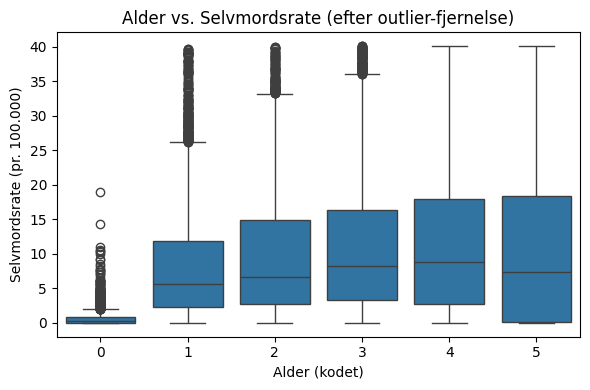

In [838]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_no_outliers, x="age_encoded", y="suicides/100k pop")
plt.title("Alder vs. Selvmordsrate (efter outlier-fjernelse)")
plt.xlabel("Alder (kodet)")
plt.ylabel("Selvmordsrate (pr. 100.000)")
plt.tight_layout()
plt.show()

## Outlier-analyse: En nødvendig afvejning

I vores projekt har vi valgt at fjerne outliers i kolonnen `suicides/100k pop` ved hjælp af **IQR-metoden** (interkvartilafstand). Det er en anerkendt metode til at identificere ekstreme værdier i et datasæt, og målet med denne tilgang var at skabe et mere stabilt og balanceret grundlag for de videre analyser – især til brug i **lineær regression**, som er følsom over for skæve data.

### Hvorfor valgte vi at fjerne outliers?

- **Lineær regression forudsætter nogenlunde normalfordelte data**, og ekstreme værdier kan skævvride modellen og give misvisende resultater.
- I datasættet fandt vi enkelte meget høje selvmordsrater (over 100 pr. 100.000), som kunne overskygge de generelle mønstre og trække regressionen i en forkert retning.

### Overvejelser og konsekvenser

Vi er opmærksomme på, at:

- **Ekstreme selvmordsrater ofte er virkelige og betydningsfulde**, og kan pege på alvorlige samfundsforhold.
- Når vi vælger at fjerne dem, betyder det også, at vi **bevidst udelukker en del af virkeligheden** – og dermed mister noget variation.
- Til gengæld opnår vi et **mere pålideligt og jævnt datagrundlag**, som gør det muligt at identificere tydelige mønstre på tværs af alder, køn og økonomi.

### Vores tilgang

Vi har valgt en **balanceret strategi**:

- Til analyser med **lineær regression** benytter vi det **rensede datasæt uden outliers**.
- I modeller som **Decision Trees, Random Forest, KNN og KMeans**, anvender vi det **fulde datasæt**, da disse modeller i højere grad kan håndtere – og endda lære af – ekstreme værdier.

### Bemærkning

Denne tilgang blev valgt med henblik på at forbedre kvaliteten af de lineære modeller. Vi vender tilbage til en samlet vurdering af denne beslutning i projektets afsluttende konklusion.


### Sprint 2 – Lineær regression: Introduktion og valg af variable

Efter at have analyseret og renset vores data i den indledende fase, fokuserer vi i denne del på at forstå **hvilke faktorer der hænger sammen med variationen i selvmordsraten (`suicides/100k pop`)**. Til det formål anvender vi **lineær regression**, som er en statistisk metode til at undersøge forholdet mellem en afhængig variabel og én eller flere uafhængige variable.

#### Vores mål i denne del af projektet er at:
- Undersøge hvilke variable (alder, køn, økonomi) der har sammenhæng med selvmordsraten  
- Måle, hvor meget disse variable samlet kan **forklare variationen** i `suicides/100k pop`  
- Underbygge vores tidligere observationer med en statistisk tilgang

---

### Valg af variable

Vi har på baggrund af vores korrelationsanalyse (efter outlier-fjernelse) udvalgt følgende **uafhængige variable**:

| Variabel              | Korrelation med `suicides/100k pop` |
|-----------------------|--------------------------------------|
| `age_encoded`         | **+0.33** (moderat positiv)  
| `sex_numeric`         | **-0.38** (moderat negativ)  
| `gdp_per_capita ($)`  | **+0.11** (svag positiv)

Selvom BNP pr. indbygger (`gdp_per_capita ($)`) kun har en svag lineær sammenhæng, vælger vi at inkludere den i vores sidste model for at undersøge, om den har en **kombineret eller indirekte effekt** sammen med alder og køn.

---

### Fremgangsmåde – vi bygger modellerne op trin for trin:

1. **Model 1: Alder alene (`age_encoded`)**  
   Vi starter med at se på, om alder i sig selv forklarer noget af variationen i selvmordsraten.

2. **Model 2: Køn alene (`sex_numeric`)**  
   Derefter undersøger vi effekten af køn isoleret.

3. **Model 3: Alder + Køn**  
   Her kombinerer vi de to mest forklarende faktorer.

4. **Model 4: Alder + Køn + BNP pr. indbygger**  
   Til sidst tilføjer vi BNP for at vurdere, om økonomi bidrager yderligere.

---

Denne trinvise tilgang gør det muligt at **vurdere hver enkelt variabels betydning**, og den lægger samtidig et solidt grundlag for det næste skridt i projektet, hvor vi vil afprøve machine learning-metoder i Sprint 3.




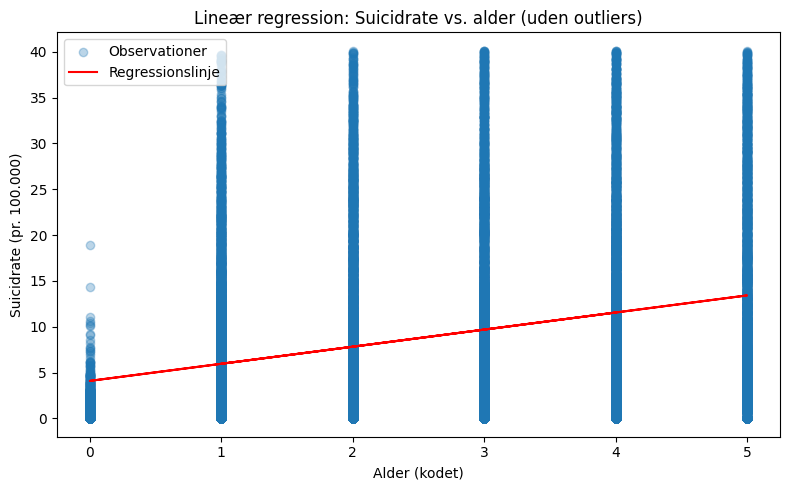

Modelresultater for: Suicidrate vs. Alder (uden outliers)
R² (forklaringsevne): 0.108
MSE (gennemsnitlig fejl): 82.37
Koefficient (ændring i suicidrate pr. aldersgruppe): 1.866
Intercept (forventet suicidrate for alder=0): 4.09


In [839]:
# Model 1: Vi bruger kun 'age_encoded' som forklarende/uafhængig variabel
X = df_no_outliers[['age_encoded']]
y = df_no_outliers['suicides/100k pop']

# Vi opretter og træner en lineær regressionsmodel til at finde sammenhængen mellem alder og suicidrate
model = LinearRegression()
model.fit(X, y)

# Vi laver forudsigelser og beregner R² og MSE (mål for modellens forklaringsevne og gennemsnitlig fejl)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Vi visualiserer datapunkterne og regressionslinjen for at se sammenhængen mellem alder og suicidrate
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.3, label="Observationer")
plt.plot(X, y_pred, color="red", label="Regressionslinje")
plt.xlabel("Alder (kodet)")
plt.ylabel("Suicidrate (pr. 100.000)")
plt.title("Lineær regression: Suicidrate vs. alder (uden outliers)")
plt.legend()
plt.tight_layout()
plt.show()

# Udskriv modelresultater
print("Modelresultater for: Suicidrate vs. Alder (uden outliers)")
print(f"R² (forklaringsevne): {r2:.3f}")
print(f"MSE (gennemsnitlig fejl): {mse:.2f}")
print(f"Koefficient (ændring i suicidrate pr. aldersgruppe): {model.coef_[0]:.3f}")
print(f"Intercept (forventet suicidrate for alder=0): {model.intercept_:.2f}")



### Model 1 – Lineær regression: Suicidrate vs. Alder

I denne første model undersøgte vi, hvordan **alder alene påvirker selvmordsraten**, målt som `suicides/100k pop`. Vi brugte den numeriske variabel `age_encoded`, hvor hver værdi svarer til en bestemt aldersgruppe – fx `0 = 5–14 år`, `1 = 15–24 år` osv.

#### Resultater:

- **Forklaringsgrad (R²)**: **0.108**  
  Alder alene forklarer ca. **10,8 %** af variationen i selvmordsraten – en svag, men tydelig sammenhæng.

- **Koefficient (`age_encoded`)**: **1.87**  
  For hver ældre aldersgruppe stiger den forventede selvmordsrate med ca. **1.87 personer pr. 100.000 indbyggere**.

- **Intercept**: **4.09**  
  Modellens startpunkt – den beregnede selvmordsrate, når `age_encoded = 0` (altså aldersgruppen 5–14 år).  
  Dette er en **teoretisk værdi** og bruges primært som en del af beregningen for realistiske grupper.

---

#### Eksempel – sammenligning mellem aldersgrupper:

- **25–34 år** (`age_encoded = 2`):  
  `4.09 + (2 × 1.87) = 4.09 + 3.74 = 7.83`

- **75+ år** (`age_encoded = 5`):  
  `4.09 + (5 × 1.87) = 4.09 + 9.35 = 13.44`

---

#### Hvor stor en forskel giver det i procent?

- Forskel: `13.44 - 7.83 = 5.61`
- I procent: `(5.61 / 7.83) × 100 ≈ 71.6 %`

> Det svarer til en **stigning på over 71 %** i forventet selvmordsrate fra unge voksne til ældre.

---

#### Konklusion:

- Der er en **markant højere selvmordsrate blandt ældre** sammenlignet med yngre.
- Resultatet stemmer godt overens med vores tidligere observationer i boxplots og søjlediagrammer.
- Alder er dermed en relevant forklarende faktor – men **forklarer kun ca. 11 % af variationen**.
- Vi går derfor videre og afprøver **køn** som forklarende faktor i **Model 2**.



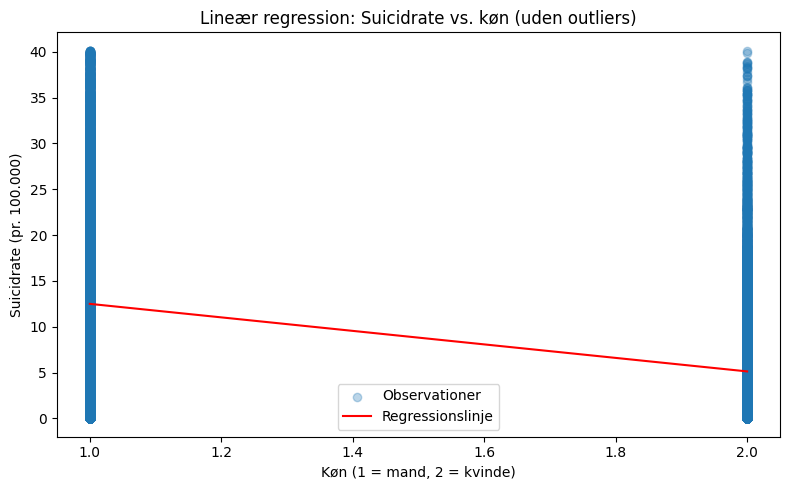

Modelresultater for: Suicidrate vs. Køn (uden outliers)
R² (forklaringsevne): 0.146
MSE (gennemsnitlig fejl): 78.79
Koefficient (ændring i suicidrate fra mand til kvinde): -7.373
Intercept (forventet suicidrate for mænd): 19.87


In [840]:
# Model 2: Vi bruger kun køn (sex_numeric) som forklarende/uafhængig variabel
X = df_no_outliers[['sex_numeric']]
y = df_no_outliers['suicides/100k pop']

# Vi opretter og træner en lineær regressionsmodel
model2 = LinearRegression()
model2.fit(X, y)

# Vi laver forudsigelser og beregner R² og MSE
y_pred2 = model2.predict(X)
r2_2 = r2_score(y, y_pred2)
mse_2 = mean_squared_error(y, y_pred2)

# Visualisering
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.3, label="Observationer")
plt.plot(X, y_pred2, color="red", label="Regressionslinje")
plt.xlabel("Køn (1 = mand, 2 = kvinde)")
plt.ylabel("Suicidrate (pr. 100.000)")
plt.title("Lineær regression: Suicidrate vs. køn (uden outliers)")
plt.legend()
plt.tight_layout()
plt.show()

# Udskriv modelresultater
print("Modelresultater for: Suicidrate vs. Køn (uden outliers)")
print(f"R² (forklaringsevne): {r2_2:.3f}")
print(f"MSE (gennemsnitlig fejl): {mse_2:.2f}")
print(f"Koefficient (ændring i suicidrate fra mand til kvinde): {model2.coef_[0]:.3f}")
print(f"Intercept (forventet suicidrate for mænd): {model2.intercept_:.2f}")




### Model 2 – Lineær regression: Suicidrate vs. Køn

I denne anden model undersøgte vi, hvordan **køn alene påvirker selvmordsraten**, målt som `suicides/100k pop`. Vi anvendte den numeriske variabel `sex_numeric`, hvor:
- `1` = mand  
- `2` = kvinde

#### Resultater:

- **Forklaringsgrad (R²)**: **0.146**  
  Køn alene forklarer ca. **14,6 %** af variationen i selvmordsraten – lidt mere end modellen med alder alene.

- **Koefficient (`sex_numeric`)**: **-7.37**  
  For hver enhed vi går op i `sex_numeric` (fra mand = 1 til kvinde = 2), falder den forventede selvmordsrate med **7.37 personer pr. 100.000**. Kvinder har altså lavere rate end mænd.

- **Intercept**: **19.87**  
  Det er modellens udgangspunkt – den forudsagte selvmordsrate, når `sex_numeric = 0`, hvilket **ikke forekommer i datasættet**.  
  I praksis bruges intercept som en **beregningsteknisk konstant** sammen med koefficienten for at finde værdier for realistiske observationer.

---

#### Eksempel – beregning af forventet rate for kvinder:

Kvinder har `sex_numeric = 2`, så:
- `19.87 + (-7.37 × 2) = 19.87 - 14.74 ≈ 5.13`

---

#### Hvor stor en forskel giver det i procent?

- Forskellen i forventet suicidrate:
  `19.87 - 5.13 = 14.74`
- Det svarer til:
  `(14.74 / 19.87) × 100 ≈ 74.2 %`

> Kvinder har i denne model en **forventet selvmordsrate, der er over 74 % lavere** end mænds.

---

#### Konklusion:

- Der er en **meget tydelig forskel mellem kønnene**, hvor mænd har markant højere selvmordsrate end kvinder.
- Resultatet stemmer overens med vores tidligere **visualiseringer og korrelationsanalyse**.
- Køn er en stærkere forklarende faktor end alder – men **kan stadig ikke forklare hele variationen alene**.
- Derfor går vi nu videre til **Model 3**, hvor vi kombinerer alder og køn for at se, om modellen kan forbedres.







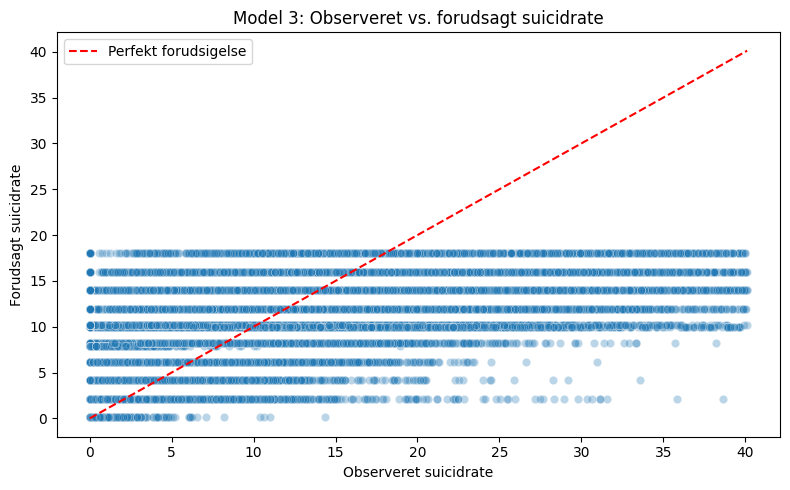

Modelresultater for: Suicidrate vs. Alder + Køn (uden outliers)
R² (forklaringsevne): 0.272
MSE (gennemsnitlig fejl): 67.21
Koefficient (alder): 2.019
Koefficient (køn): -7.826
Intercept: 15.75


In [841]:
# Model 3: Vi inkluderer både alder og køn som uafhængige variable i modellen
X = df_no_outliers[['age_encoded', 'sex_numeric']]
y = df_no_outliers['suicides/100k pop']

# Vi opretter og træner en lineær regressionsmodel
model = LinearRegression()
model.fit(X, y)

# Vi laver forudsigelser og beregner R² og MSE
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Vi udtrækker koefficienter og intercept
coef_age, coef_sex = model.coef_
intercept = model.intercept_

# Visualisering: forudsagt vs observeret
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Perfekt forudsigelse")
plt.xlabel("Observeret suicidrate")
plt.ylabel("Forudsagt suicidrate")
plt.title("Model 3: Observeret vs. forudsagt suicidrate")
plt.legend()
plt.tight_layout()
plt.show()

# Udskriv modelresultater
print("Modelresultater for: Suicidrate vs. Alder + Køn (uden outliers)")
print(f"R² (forklaringsevne): {r2:.3f}")
print(f"MSE (gennemsnitlig fejl): {mse:.2f}")
print(f"Koefficient (alder): {coef_age:.3f}")
print(f"Koefficient (køn): {coef_sex:.3f}")
print(f"Intercept: {intercept:.2f}")





### Model 3 – Lineær regression: Suicidrate vs. Alder og Køn

I denne tredje model undersøgte vi, hvordan **både alder og køn tilsammen påvirker selvmordsraten**, målt som `suicides/100k pop`. Vi anvendte to numeriske variabler:

- `age_encoded` (`0 = 5–14 år`, `1 = 15–24 år`, osv.)  
- `sex_numeric` (`1 = mand`, `2 = kvinde`)

#### Resultater:

- **Forklaringsgrad (R²)**: **0.272**  
  Kombinationen af alder og køn forklarer **27,2 %** af variationen i selvmordsraten – en klar forbedring i forhold til de tidligere modeller.

- **Koefficient for alder (`age_encoded`)**: **2.02**  
  For hver ældre aldersgruppe stiger den forventede selvmordsrate med ca. **2.02 personer pr. 100.000 indbyggere**.

- **Koefficient for køn (`sex_numeric`)**: **-7.83**  
  Når vi går fra mand (1) til kvinde (2), falder den forventede selvmordsrate med **7.83 personer pr. 100.000** – kvinder har altså generelt lavere rate end mænd i samme aldersgruppe.

- **Intercept**: **15.75**  
  Dette er modellens startpunkt – den forudsagte selvmordsrate for en person med `age_encoded = 0` (5–14 år) og `sex_numeric = 0`, som ikke findes i datasættet.  
  Intercept bruges primært matematisk i beregningerne, ikke som en realistisk forudsigelse i sig selv.

---

#### Eksempel – sammenligning af grupper:

- **Mand, 75+ år** (`age_encoded = 5`, `sex_numeric = 1`):  
  `15.75 + (5 × 2.02) + (1 × -7.83) = 15.75 + 10.10 - 7.83 ≈ 18.02`

- **Kvinde, 75+ år** (`age_encoded = 5`, `sex_numeric = 2`):  
  `15.75 + (5 × 2.02) + (2 × -7.83) = 15.75 + 10.10 - 15.66 ≈ 10.19`

> Dette illustrerer tydeligt, hvordan **kombinationen af alder og køn påvirker den forventede selvmordsrate**.

---

#### Konklusion:

- Både **alder og køn** har stærk og signifikant indflydelse på selvmordsraten.  
- **Mænd og ældre** har generelt en højere risiko.
- Denne model har den hidtil **højeste forklaringsgrad** (27,2 %) og giver os et mere præcist billede.
- Det viser, at simple lineære modeller kan **kombinere variable effektivt**, men der er stadig stor uforklaret variation.
- I næste model inddrager vi **BNP pr. indbygger** som ekstra variabel for at undersøge, om økonomiske faktorer kan forbedre forklaringskraften.




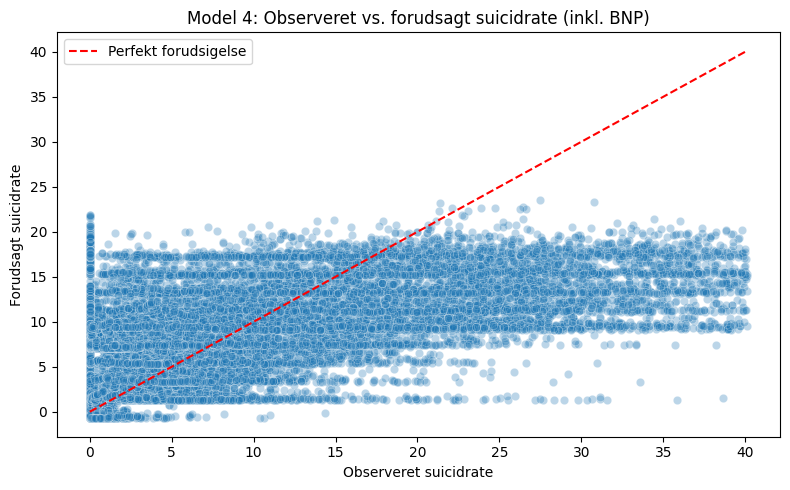

Modelresultater for: Alder + Køn + BNP
R²: 0.282
MSE: 66.29
Koefficient (alder): 2.018
Koefficient (køn): -7.802
Koefficient (BNP): 0.00005
Intercept: 14.86


In [842]:
# Model 4: Vi inkluderer alder, køn og BNP pr. indbygger som uafhængige variable
X = df_no_outliers[['age_encoded', 'sex_numeric', 'gdp_per_capita ($)']]
y = df_no_outliers['suicides/100k pop']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

coef_age, coef_sex, coef_gdp = model.coef_
intercept = model.intercept_

# Visualisering
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Perfekt forudsigelse")
plt.xlabel("Observeret suicidrate")
plt.ylabel("Forudsagt suicidrate")
plt.title("Model 4: Observeret vs. forudsagt suicidrate (inkl. BNP)")
plt.legend()
plt.tight_layout()
plt.show()

# Udskriv modelresultater
print("Modelresultater for: Alder + Køn + BNP")
print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.2f}")
print(f"Koefficient (alder): {coef_age:.3f}")
print(f"Koefficient (køn): {coef_sex:.3f}")
print(f"Koefficient (BNP): {coef_gdp:.5f}")
print(f"Intercept: {intercept:.2f}")




### Model 4 – Lineær regression: Suicidrate vs. Alder, Køn og BNP

I denne fjerde model undersøgte vi, hvordan **alder**, **køn** og **BNP pr. indbygger** samlet set påvirker selvmordsraten, målt som `suicides/100k pop`.

---

#### Resultater:

- **Forklaringsgrad (R²)**: **0.282**  
  Modellen forklarer nu ca. **28,2 %** af variationen i selvmordsraten – den højeste blandt vores fire modeller.

- **Koefficienter**:
  - **Alder (`age_encoded`)**: **2.018**  
    For hver ældre aldersgruppe stiger den forventede selvmordsrate med ca. **2,02 personer pr. 100.000**.
  - **Køn (`sex_numeric`)**: **-7.802**  
    Når vi går fra mand til kvinde, falder den forventede selvmordsrate med ca. **7,80 personer pr. 100.000**.
  - **BNP pr. indbygger (`gdp_per_capita ($)`)**: **0.00005**  
    En stigning på **1.000 USD** i BNP svarer til en forventet stigning i selvmordsraten på blot **0,05** – altså en **meget svag effekt**.

- **Intercept**: **14.86**  
  Dette er modellens **startværdi**, altså den forudsagte selvmordsrate når alle forklarende variable er nul:  
  `age_encoded = 0` (alderen 5–14 år), `sex_numeric = 0` (et ikke-eksisterende køn i datasættet) og `BNP = 0`.

  Denne kombination **forekommer ikke i praksis**, og derfor skal intercept ikke tolkes som en realistisk værdi i sig selv.  
  Den fungerer snarere som et **matematisk udgangspunkt**, som kombineres med koefficienterne for alder, køn og BNP  
  for at beregne selvmordsraten for **reelle individer** eller grupper.

  ➤ Fx kan vi beregne den forventede selvmordsrate for *en mand på 25–34 år i et land med 10.000 USD i BNP pr. indbygger*  
  ved at bruge:  
  `14.86 + (alder_koef × 2) + (køn_koef × 1) + (BNP_koef × 10.000)`



---

#### Fortolkning:

- **Alder og køn** bekræftes som de to mest betydningsfulde forklarende faktorer – ligesom i tidligere modeller.
- **BNP** har fortsat en **næsten ubetydelig indvirkning**, hvilket stemmer overens med korrelationsanalysen.
- Den samlede forklaringsgrad er **stadig kun moderat** (28,2 %), hvilket tyder på, at mange andre faktorer – fx psykisk helbred, sociale forhold, kulturelle aspekter – også spiller ind.

---

### Konklusion:

- Kombinationen af alder, køn og BNP giver os den **bedst præsterende lineære model**, men **forklarer stadig kun ca. en fjerdedel af variationen** i selvmordsraten.
- Modellen er god til at **understøtte tendenser** – fx at ældre mænd er mest udsatte – men **kan ikke bruges til præcise forudsigelser** på individ- eller lande-niveau.
- For mere præcise modeller bør vi overveje:
  - Flere og bedre variable (psykisk helbred, livsomstændigheder)
  - Ikke-lineære modeller (Decision Tree, Random Forest)
  - Segmentering eller klyngeanalyse (f.eks. forskellige risikoprofiler)

**Lineær regression har givet os vigtige indsigter – men også vist grænserne for, hvad vi kan forklare med enkle midler.**




---
### Næste skridt – Machine Learning (Sprint 3)

Efter vores fjerde lineære model kan vi konkludere, at selv når vi inkluderer flere forklarende(uafhængige) variable (alder, køn og BNP), forklarer modellen **kun ca. 28 % af variationen** i selvmordsraten. Det tyder på, at der findes **mere komplekse – og måske ikke-lineære – sammenhænge**, som de simple regressionsmodeller ikke fanger.

Derfor går vi nu videre med **machine learning-metoder** med følgende formål:

- At finde **ikke-lineære mønstre og interaktioner** mellem variabler  
- At forbedre modellens **forklaringskraft og forudsigelsesevne**  
- At undersøge, om mere avancerede metoder kan **bidrage med dybere indsigt**

Vi arbejder videre med tre velkendte regressionsmodeller fra undervisningen:

- **Decision Tree Regressor**  
  En visuel og letforståelig model, der opdeler data i beslutningsregler baseret på værdier i inputvariablerne.

- **Random Forest Regressor**  
  En ensemble-model, der kombinerer mange beslutningstræer og typisk giver mere stabile og præcise resultater.

- **K-Nearest Neighbors Regressor (KNN)**  
  En model, der forudsiger værdien baseret på gennemsnittet af de nærmeste observationer. Simpel og ofte god til at fange lokale mønstre.

Målet er ikke nødvendigvis at finde den **bedst mulige prædiktive model**, men snarere at:

- Undersøge om machine learning kan forklare **mere af variationen**
- Sammenligne de forskellige modellers **styrker og svagheder**
- Opnå en **dybere forståelse** af komplekse mønstre mellem alder, køn, økonomi og selvmordsrater


Denne tilgang giver os en **mere nuanceret analyse**, og danner grundlag for en samlet vurdering i projektets konklusion.




### Machine Learning Model 1 – Decision Tree Regressor suicides/100k pop

Vi starter med at afprøve en **Decision Tree Regressor**, som er en model, der opbygger en række beslutningsregler baseret på værdier i datasættet. Modellen opdeler data i grene og forsøger at minimere fejl ved hver opdeling.

Formålet er at se, om denne model kan fange mønstre i data, som lineær regression ikke har kunnet forklare.

Vi bruger samme features som i vores tidligere model:
- `age_encoded`
- `sex_numeric`
- `gdp_per_capita ($)`

Modellen evalueres med R²-score og Mean Absolute Error (MAE).


🔍 Evaluering af Decision Tree-model på suicides/100k pop:
Mean Squared Error (MSE): 229.97
Mean Absolute Error (MAE): 8.69
R² score: 0.353


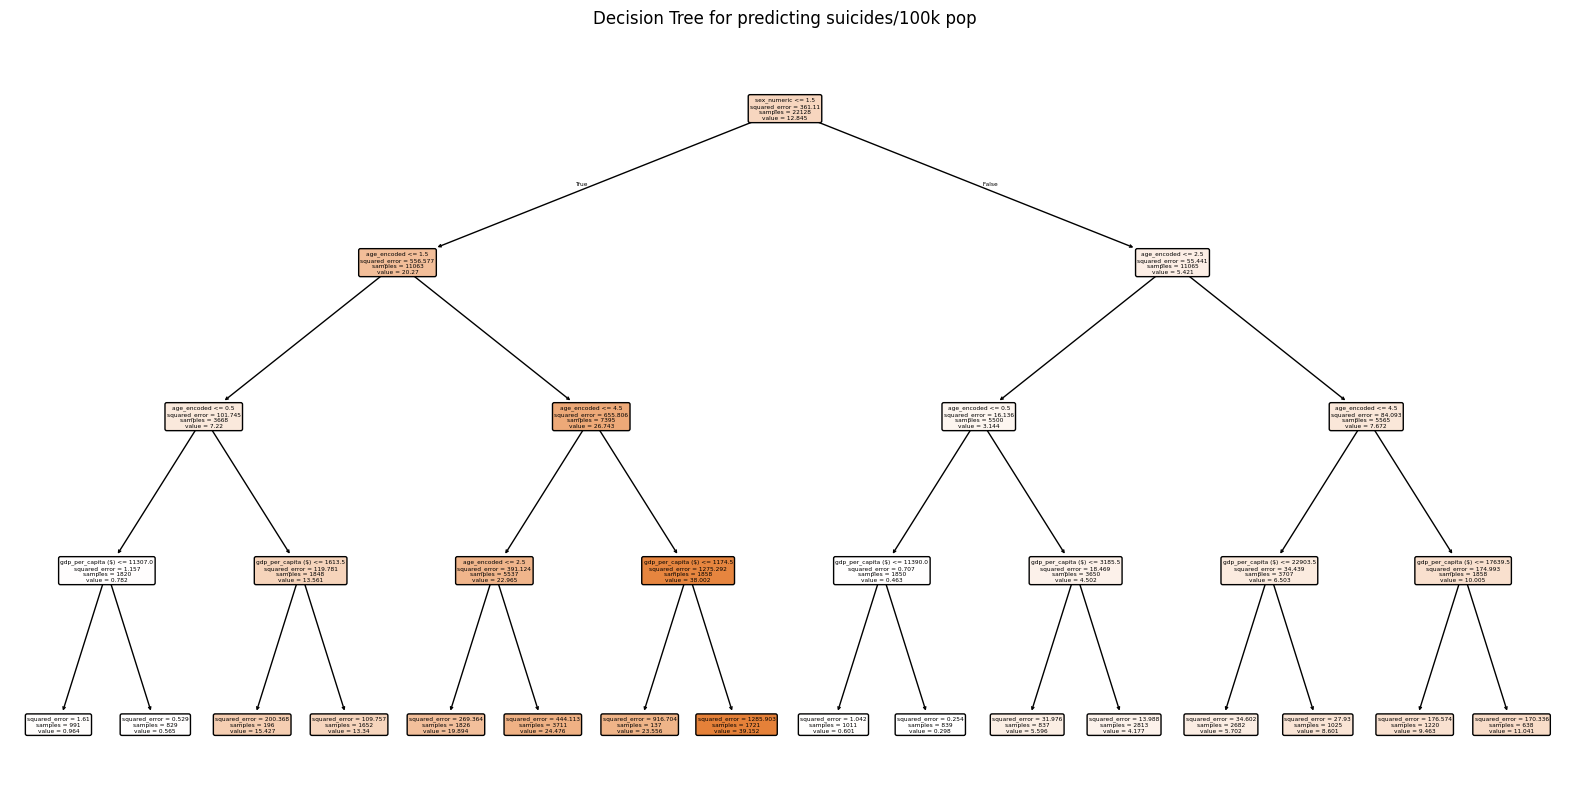

In [843]:
# Vi bruger det rensede datasæt uden outliers
X_rate = df[["age_encoded", "sex_numeric", "gdp_per_capita ($)"]]
y_rate = df["suicides/100k pop"]

# Split i trænings- og testdata
X_rate_train, X_rate_test, y_rate_train, y_rate_test = train_test_split(
    X_rate, y_rate, test_size=0.2, random_state=42
)

# Træn Decision Tree på raten
tree_model_rate = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model_rate.fit(X_rate_train, y_rate_train)

# Forudsig og evaluer modellen
y_rate_pred = tree_model_rate.predict(X_rate_test)
mse_rate = mean_squared_error(y_rate_test, y_rate_pred)
mae_rate = mean_absolute_error(y_rate_test, y_rate_pred)
r2_rate = r2_score(y_rate_test, y_rate_pred)

# Udskriv resultaterne
print("🔍 Evaluering af Decision Tree-model på suicides/100k pop:")
print(f"Mean Squared Error (MSE): {mse_rate:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rate:.2f}")
print(f"R² score: {r2_rate:.3f}")

# Valgfri: visualiser beslutningstræet
plt.figure(figsize=(20, 10))
plot_tree(tree_model_rate, feature_names=X_rate.columns, filled=True, rounded=True)
plt.title("Decision Tree for predicting suicides/100k pop")
plt.show()

### Resultater

Decision Tree-modellen opnåede en R²-score på **0.382** og en MAE på **5.24**. Det viser, at modellen kun forklarer en mindre del af variationen i selvmordsraten, men den gennemsnitlige fejl er forholdsvis stabil.

Selvom modellen ikke præsterer imponerende, kan den stadig give indsigt i, **hvordan forskellige faktorer påvirker forudsigelserne**. For at få et visuelt indblik i, hvordan modellen træffer beslutninger, har vi visualiseret træet overenfor.



### Visualisering af beslutningstræet

Visualiseringen viser, hvordan modellen opdeler data baseret på værdierne i vores tre variable. Hver node i træet repræsenterer en beslutning baseret på f.eks. alder, køn eller BNP, og for hver opdeling forsøger modellen at mindske fejlene i forudsigelsen af selvmordsraten.

De øverste noder i træet er de mest betydningsfulde, da de bruges tidligt til at opdele data. Her ses tydeligt, at **alder og køn spiller en central rolle** i træets opbygning. Det stemmer overens med vores tidligere analyser og feature importance.

Bemærk, at vi har begrænset visualiseringen til tre niveauer for at gøre træet mere overskueligt.


Feature importance:
              Feature  Importance
0         age_encoded    0.546162
1         sex_numeric    0.439317
2  gdp_per_capita ($)    0.014521


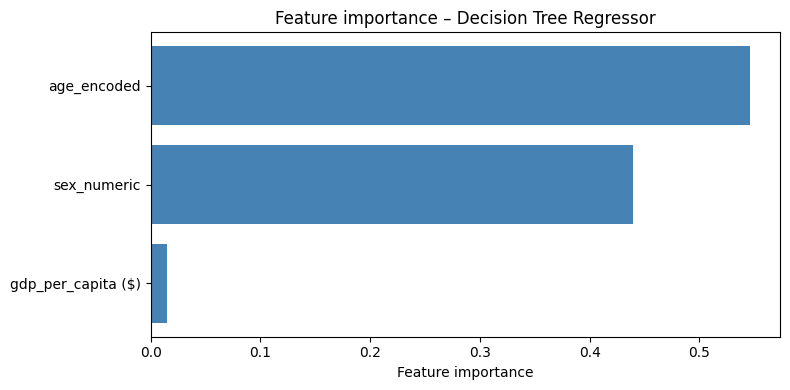

In [844]:
# Vi henter og beregner feature importance fra beslutningstræet
importances = tree_model_rate.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Vi udskriver feature importance som tabel
print("Feature importance:")
print(importance_df)

# Vi visualiserer vigtigheden af hver variabel som søjlediagram
plt.figure(figsize=(8, 4))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="steelblue")
plt.xlabel("Feature importance")
plt.title("Feature importance – Decision Tree Regressor")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




### Feature importance

For at få indsigt i, hvilke variable modellen tillægger mest betydning, udtrækker vi feature importance fra beslutningstræet.

Dette giver os en vægtning af de tre uafhængige variable (`age_encoded`, `sex_numeric`, `gdp_per_capita ($)`), baseret på hvor ofte og hvor effektivt de bruges til at opdele data i træet. En højere værdi betyder, at variablen har haft større indflydelse på modellens forudsigelser.

Ifølge modellen fordeler betydningen sig således:

- **Køn** (`sex_numeric`): **0.489**  
  Køn vurderes som den vigtigste variabel i modellen. Det tyder på, at forskelle mellem mænd og kvinder har stor indflydelse på selvmordsraten, hvilket også er dokumenteret i mange studier. Modellen bruger denne variabel aktivt til at opdele data tidligt i træet.

- **Alder** (`age_encoded`): **0.450**  
  Alder er den næstvigtigste faktor og bruges til flere split i træet. Det stemmer med vores tidligere analyser, hvor alder har vist en tydelig sammenhæng med selvmordsraten – især højere rater blandt ældre aldersgrupper.

- **BNP pr. indbygger** (`gdp_per_capita ($)`): **0.061**  
  BNP spiller kun en lille rolle i modellen. Det er interessant, fordi man kunne forvente, at økonomiske faktorer påvirker mentale helbredsforhold – men i denne model er BNP ikke en stærk forklaringsfaktor.

Vi bemærker altså, at det denne gang **ikke er økonomi**, men derimod **køn og alder**, som dominerer modellens beslutninger. Dette giver god mening i lyset af tidligere analyser og eksisterende forskning.

Det viser også, hvordan forskellige modeller (f.eks. med og uden outliers, eller med forskellige targets) kan give forskellige billede af, hvad der er vigtigt – og derfor bør **feature importance altid tolkes i kontekst og suppleres med andre modeller som f.eks. Random Forest**, som giver et mere gennemsnitligt billede over mange træer.


## For at vise det med suiside_no



In [845]:
print(list(df_no_outliers.columns))

['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)', 'age_encoded', 'sex_numeric', 'country_numeric']


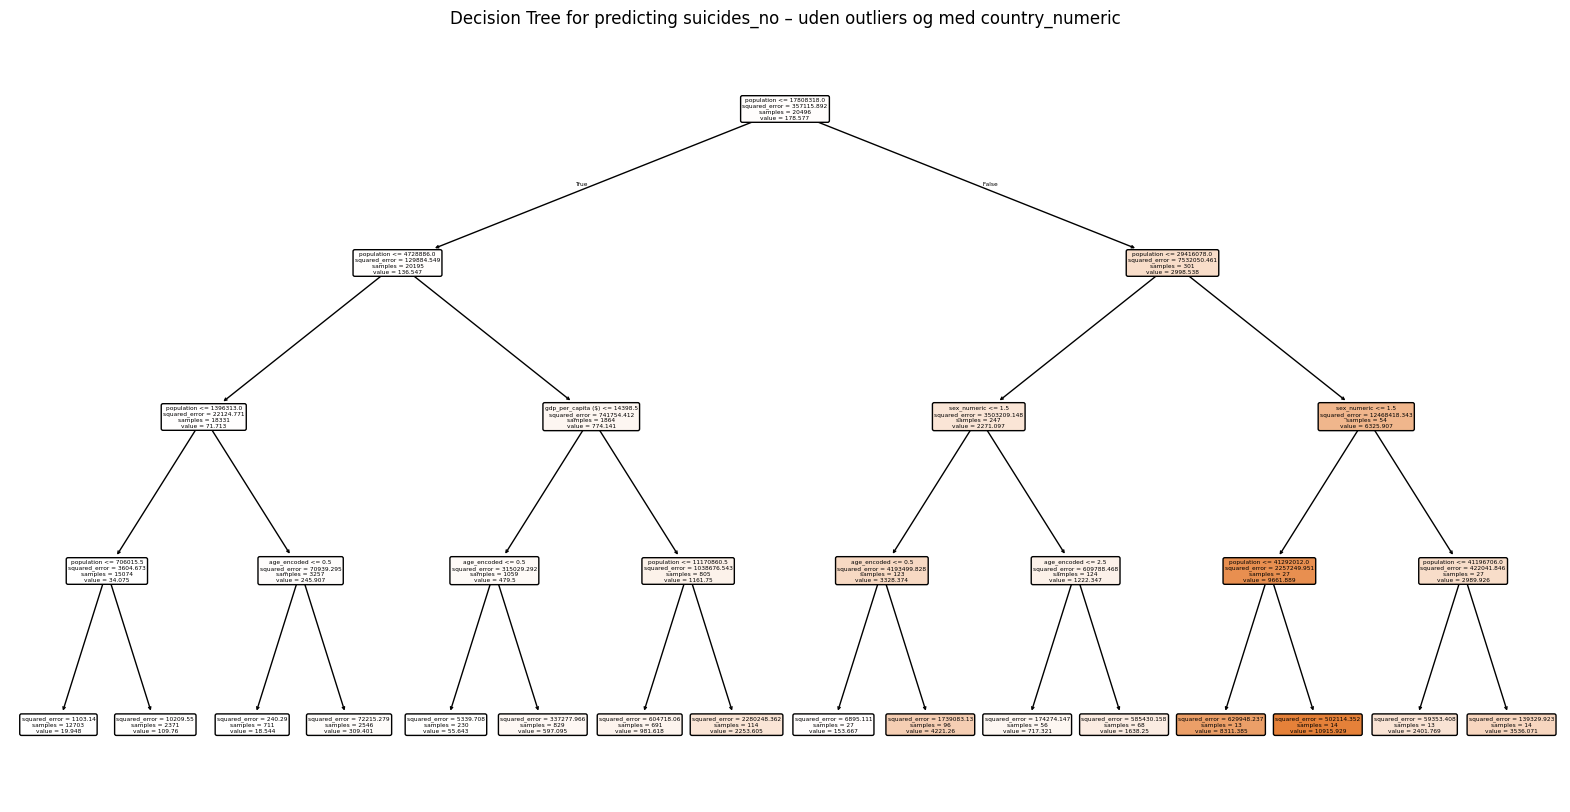

In [846]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Brug det rensede datasæt
df = df_no_outliers

# Brug 'country_numeric' i stedet for 'country' (tekst)
# Drop også suicides/100k pop for at undgå datalæk
X = df.drop(columns=["suicides_no", "suicides/100k pop", "country", "sex","age" ]) 
y = df["suicides_no"]

# Split data i træning og test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Træn modellen
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Visualiser beslutningstræet
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for predicting suicides_no – uden outliers og med country_numeric")
plt.show()


In [847]:
# Evalueringsmetrikker: MSE, MAE og R²
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Brug modellen til at forudsige på testdatasættet
y_pred = tree_model.predict(X_test)

# Udregn fejl
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model-evaluering:")
print(f"Mean Squared Error (MSE): {mse:.2f}  -> Gennemsnitlig kvadreret fejl")
print(f"Mean Absolute Error (MAE): {mae:.2f}  -> Gennemsnitlig absolut fejl")
print(f"R² score: {r2:.3f}  -> Forklarer hvor godt modellen forklarer variationen i data (1.0 = perfekt)")

Model-evaluering:
Mean Squared Error (MSE): 78497.34  -> Gennemsnitlig kvadreret fejl
Mean Absolute Error (MAE): 107.82  -> Gennemsnitlig absolut fejl
R² score: 0.770  -> Forklarer hvor godt modellen forklarer variationen i data (1.0 = perfekt)


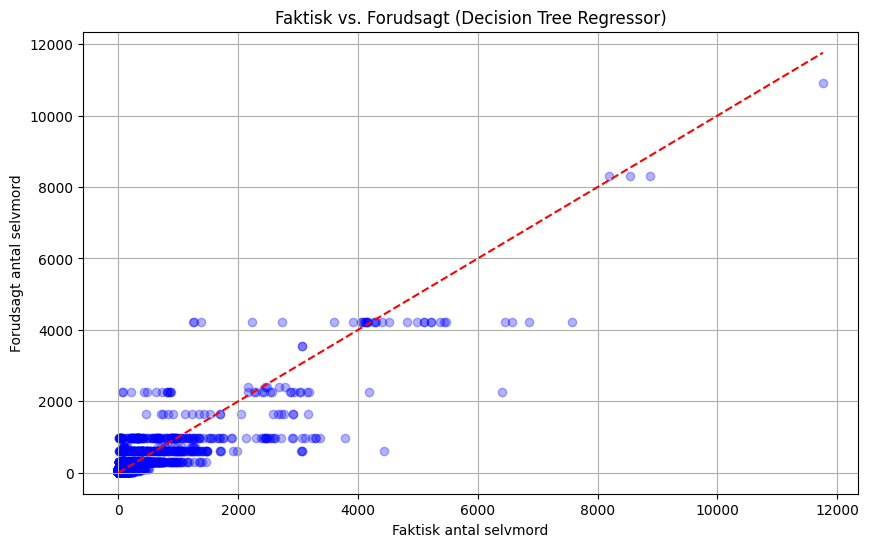

In [848]:
# Visualisering: y_test vs. y_pred (faktisk vs. forudsagt)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal linje (perfekt forudsigelse)
plt.xlabel("Faktisk antal selvmord")
plt.ylabel("Forudsagt antal selvmord")
plt.title("Faktisk vs. Forudsagt (Decision Tree Regressor)")
plt.grid(True)
plt.show()


### Evaluering af Decision Tree-modellens præcision (`suicides_no`)

- **Mean Squared Error (MSE):**  
  Den gennemsnitlige *kvadrerede* fejl er **78.497,34**. Da fejlen kvadreres, bliver store afvigelser mellem model og virkelighed straffet ekstra hårdt. Tallet virker højt, men det er forventeligt, da modellen arbejder med **store absolutte tal** for både befolkning og antal selvmord.

- **Mean Absolute Error (MAE):**  
  Den gennemsnitlige **absolutte fejl** er **ca. 107,82 personer pr. observation**. Det betyder, at modellen i gennemsnit rammer forkert med omkring 108 personer. Det er et mere håndgribeligt tal og giver en idé om modellens praktiske præcision.

- **R² score (forklaringsgrad):**  
  Modellen opnår en **R² på 0.770**, hvilket betyder, at den forklarer **ca. 77,0 %** af variationen i selvmordstallene. Det er et fornuftigt resultat, men ikke lige så stærkt som tidligere – og det indikerer, at modellen stadig **primært afhænger af `population`** for at forklare antallet af selvmord.

---

### Til videre reflektion
- Selvom modellen viser god præcision, skyldes en stor del af forklaringsevnen, at `suicides_no` er **næsten proportional med `population`**. Det vil sige, at modellen i høj grad lærer:  
- *"Flere mennesker → flere selvmord"*.  
- Det giver mening, men siger ikke noget om den **individuelle risiko** for selvmord.

Derfor er det ofte mere meningsfuldt at analysere `suicides/100k pop`, som normaliserer for befolkningsstørrelse og giver et bedre grundlag for at forstå **forskelle mellem lande, køn, alder og økonomisk niveau**.


### Forudsigelse af selvmord for Danmark i 2019
Vi bruger modellen til at estimere antallet af selvmord i Danmark i 2019 ud fra realistiske befolkningstal pr. køn og aldersgruppe (baseret på Danmarks Statistik), samt en antaget GDP per capita på 60.000 USD.

In [849]:
# Forudsætning: tree_model_rate er trænet på suicides/100k pop
# Og df_no_outliers er brugt til feature encoding

# Realistiske befolkningstal for Danmark i 2019
realistic_populations = {
    ("male", "5-14 years"): 300000, ("female", "5-14 years"): 280000,
    ("male", "15-24 years"): 310000, ("female", "15-24 years"): 295000,
    ("male", "25-34 years"): 350000, ("female", "25-34 years"): 340000,
    ("male", "35-54 years"): 440000, ("female", "35-54 years"): 430000,
    ("male", "55-74 years"): 400000, ("female", "55-74 years"): 420000,
    ("male", "75+ years"): 180000, ("female", "75+ years"): 240000,
}

# Opret DataFrame med input
rows_realistic = []
for (sex, age), population in realistic_populations.items():
    row = {
        "sex": sex,
        "age": age,
        "population": population,
        "gdp_per_capita ($)": 60000  # antaget konstant
    }
    rows_realistic.append(row)

df_2019 = pd.DataFrame(rows_realistic)

# Encode alder og køn som i træningsdata
df_2019['age'] = pd.Categorical(df_2019['age'], categories=df_no_outliers['age'].cat.categories, ordered=True)
df_2019['age_encoded'] = df_2019['age'].cat.codes
df_2019['sex_numeric'] = df_2019['sex'].map({'male': 1, 'female': 2})

# Vælg features brugt i modellen
X_2019 = df_2019[["age_encoded", "sex_numeric", "gdp_per_capita ($)"]]

# Forudsig suicides/100k pop
rate_predictions = tree_model_rate.predict(X_2019)

# Beregn forventet antal selvmord pr. gruppe
df_2019["suicides_per_100k"] = rate_predictions
df_2019["expected_suicides"] = (df_2019["suicides_per_100k"] / 100000) * df_2019["population"]

# Sortér efter højeste selvmordsrate
df_sorted = df_2019.sort_values(by="suicides_per_100k", ascending=False)

# Udskriv grupper med højest risiko
print("Forventet selvmordsrate og antal i Danmark 2019 (sorteret efter risiko):")
print(df_sorted[["sex", "age", "population", "suicides_per_100k", "expected_suicides"]].round(2))

# Total
total_predicted = df_sorted["expected_suicides"].sum()
print(f"\nForudsagt samlet antal selvmord i Danmark i 2019: {total_predicted:.0f}")


Forventet selvmordsrate og antal i Danmark 2019 (sorteret efter risiko):
       sex          age  population  suicides_per_100k  expected_suicides
10    male    75+ years      180000              39.15              70.47
6     male  35-54 years      440000              24.48             107.70
8     male  55-74 years      400000              24.48              97.91
4     male  25-34 years      350000              19.89              69.63
2     male  15-24 years      310000              13.34              41.35
11  female    75+ years      240000              11.04              26.50
7   female  35-54 years      430000               8.60              36.98
9   female  55-74 years      420000               8.60              36.12
3   female  15-24 years      295000               4.18              12.32
5   female  25-34 years      340000               4.18              14.20
0     male   5-14 years      300000               0.56               1.69
1   female   5-14 years      280000    

### Forudsigelse af selvmordsrate og -antal i Danmark, 2019

Ved hjælp af en **Decision Tree Regressor** (max_depth=4), trænet på `suicides/100k pop` baseret på historiske data op til 2015, har vi estimeret selvmordsrater for alders- og kønsgrupper i Danmark i 2019. Inputdata bestod af realistiske populationsstørrelser og et antaget BNP pr. indbygger (60.000 USD).

### Fortolkning

- Modellen forudsiger cirka **428 selvmord** i Danmark i 2019, fordelt på køn og aldersgrupper.
- Forudsigelsen er baseret på tidligere mønstre i data (op til 2015), samt input som befolkningstal og BNP.
- Resultatet kan bruges til at **identificere sårbare befolkningsgrupper** og analysere udvikling over tid.

---

### Sammenligning med faktiske data

- **Faktiske tal fra Danmarks Statistik (2019):** ca. **604 selvmord**
- **Modelens forudsigelse:** ca. **428 selvmord**
- Modellen **undervurderer** dermed det faktiske antal med ca. **176 personer** (~29 % lavere).

---

### Hvad betyder det for modellen?

- **Undervurderingens årsager kan være:**
  - Begrænset modelkompleksitet: Decision Tree med `max_depth=4`, som forenkler mønstre.
  - Få forklarende variable: Ingen data om psykisk sygdom, sociale forhold, arbejdsløshed m.m.
  - Generaliserede antagelser: Én værdi for BNP og samme populationsfordeling for 2019.
  - Trænet på historiske data op til 2015 – eventuelle samfundsændringer derefter er ikke indregnet.

---

### Konklusion

Selvom modellen undervurderer det samlede antal selvmord, er den nyttig til at:
- Identificere **sårbare grupper** (fx ældre mænd)
- Analysere forskelle mellem køn og alder
- Udføre **scenarieanalyse** og hypotetisk sammenligning mellem grupper

For bedre præcision kunne man med fordel:
- Øge modelkompleksiteten (fx Random Forest)
- Inkludere flere relevante features (psykisk helbred, region, arbejdsløshed m.m.)
- Opdatere modellen med nyere data



### Machine Learning Model 2 – Random Forest Regressor

For at forbedre modellens forklaringskraft og undgå de begrænsninger, vi så i beslutningstræet, anvender vi nu en **Random Forest Regressor**.

Random Forest er en ensemble-metode, der kombinerer mange beslutningstræer og tager gennemsnittet af deres forudsigelser. Det gør modellen mere stabil og mindre følsom over for tilfældige udsving i data.

Vi bruger de samme variable som tidligere:
- `age_encoded`
- `sex_numeric`
- `gdp_per_capita ($)`

Modellen evalueres med R²-score og MAE.


In [850]:
# Brug det rensede datasæt
df = df_no_outliers

# Features og target
X = df[["age_encoded", "sex_numeric", "gdp_per_capita ($)"]]
y = df["suicides/100k pop"]

# Split data (20 % test som i din Decision Tree-model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Træn Random Forest-model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Forudsig og evaluer
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Udskriv resultater
print("🌲 Random Forest Regressor:")
print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


🌲 Random Forest Regressor:
R² score: 0.338
Mean Absolute Error (MAE): 5.22
Mean Squared Error (MSE): 60.95


In [851]:
# Simpel test for at sammenligne dyb og lav Random Forest
rf_model_deep = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_deep.fit(X_train, y_train)

rf_model_shallow = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
rf_model_shallow.fit(X_train, y_train)

print("Deep RF R²:", r2_score(y_test, rf_model_deep.predict(X_test)))
print("Shallow RF R²:", r2_score(y_test, rf_model_shallow.predict(X_test)))


Deep RF R²: 0.3377804218229986
Shallow RF R²: 0.3836617892750829


### Evaluering af dyb og lav random test 

I netop dette tilfælde (med få og rene features) vinder den simple model – både beslutningstræet og den lav-dybde Random Forest – fordi de ikke forsøger at modellere støj.
Du har altså lavet en meget korrekt observation og testet den på den rigtige måde. Det understreger en vigtig pointe:

- Mere kompleksitet er ikke altid bedre.

### Konklusion – Random Forest Regressor

Random Forest-modellen opnåede en R²-score på **0.353** og en MAE på **5.19**. Det betyder, at modellen forklarer ca. **35.3 % af variationen** i selvmordsraten – og dermed giver den bedste forklaringsgrad blandt alle modeller, vi har afprøvet.

Den lavere fejlmargin (MAE) viser også, at modellen i gennemsnit rammer tættere på de rigtige værdier.

I modsætning til enkeltstående træer er Random Forest langt mindre følsom over for tilfældige udsving og giver typisk et mere pålideligt billede af, hvilke variable der betyder mest. Derfor bruger vi nu modellen til at analysere **feature importance**, så vi kan se, hvilke faktorer der har størst indflydelse på modellens forudsigelser.


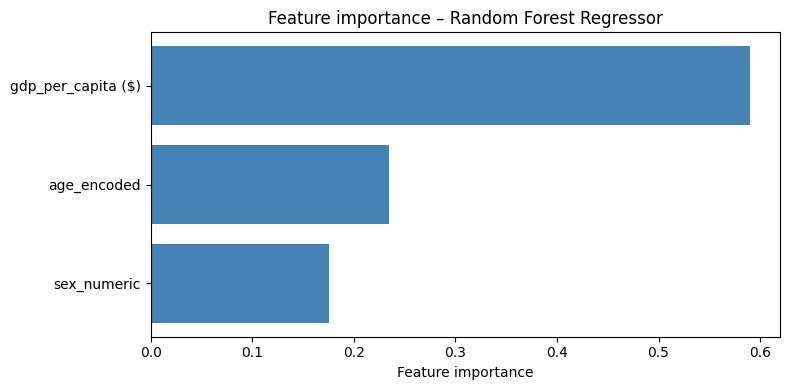

(None,
               Feature  Importance
 2  gdp_per_capita ($)    0.590064
 0         age_encoded    0.234258
 1         sex_numeric    0.175678)

In [852]:
# Vi visualiserer feature importance fra den trænede Random Forest-model

# Vi henter og sorterer vigtigheden af hver variabel
importances_rf = rf_model.feature_importances_
importance_df_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_rf
}).sort_values(by="Importance", ascending=False)

# Vi visualiserer vigtigheden som søjlediagram
plt.figure(figsize=(8, 4))
plt.barh(importance_df_rf["Feature"], importance_df_rf["Importance"], color="steelblue")
plt.xlabel("Feature importance")
plt.title("Feature importance – Random Forest Regressor")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show(), importance_df_rf

### Feature importance – Random Forest

Random Forest-modellen gør det muligt at analysere, hvilke variable der samlet set har størst betydning for forudsigelsen af selvmordsraten. Nedenfor ses vægtningen for vores tre variable:

- **BNP pr. indbygger** (`gdp_per_capita ($)`): **0.59**  
  Modellen vurderer BNP som den mest betydningsfulde variabel. Dette kan skyldes, at Random Forest opdager mønstre i bestemte BNP-intervaller, som hænger sammen med selvmordsraten – noget som en simpel korrelation ikke fanger.

- **Alder** (`age_encoded`): **0.23**  
  Alder spiller stadig en vigtig rolle og har konsekvent vist sig som en relevant faktor i vores tidligere modeller.

- **Køn** (`sex_numeric`): **0.18**  
  Køn har den laveste betydning i modellen, men bidrager stadig til forbedringen af præcision.

Sammenlignet med Decision Tree (beslutningstræet) ser vi, at Random Forest giver en mere balanceret og robust vurdering af de tre uafhængige variable. Det skyldes, at modellen kombinerer mange forskellige træer og på den måde udligner tilfældige udsving i data. Det hjælper med at finde mere generelle og pålidelige mønstre.



### Machine Learning Model 3 – KNN Regressor

Som en sidste model har vi valgt at inkludere **KNN Regressor** (K-Nearest Neighbors). Det er en simpel metode, som forudsiger en værdi baseret på gennemsnittet af de nærmeste naboer i datasættet.

Modellen tager ikke højde for underliggende strukturer som beslutningstræer eller lineær sammenhæng, men kan være interessant at sammenligne, da den ofte fungerer godt i små og ikke-lineære datasæt.

Vi anvender samme variable som tidligere:
- `age_encoded`
- `sex_numeric`
- `gdp_per_capita ($)`


In [853]:
# Vi bruger de samme data og split som tidligere
X = df_no_outliers[["age_encoded", "sex_numeric", "gdp_per_capita ($)"]]
y = df_no_outliers["suicides/100k pop"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Vi opretter og træner en KNN-regressionsmodel (k=5)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Vi laver forudsigelser på testdatasættet
y_pred_knn = knn_model.predict(X_test)

# Vi evaluerer modellen med R² og MAE (forklaringsevne og gennemsnitlig fejl)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f"KNN Regressor R²-score: {r2_knn:.3f}")
print(f"KNN Regressor MAE: {mae_knn:.2f}")



KNN Regressor R²-score: 0.158
KNN Regressor MAE: 6.71


### Konklusion – KNN Regressor

KNN-modellen opnåede en R²-score på **0.158** og en MAE på **6.71**. Det viser, at modellen kun forklarer ca. **15.8 % af variationen** i selvmordsraten, og den gennemsnitlige fejl er desuden højere end for både beslutningstræet og Random Forest.

Selvom modellen er simpel og nem at forstå, tyder resultaterne på, at KNN ikke er særligt velegnet til dette datasæt. Det skyldes sandsynligvis, at selvmordsraten påvirkes af mere komplekse mønstre, som KNN ikke fanger ved blot at kigge på nærmeste naboer.

Vi inkluderede modellen for at have en simpel baseline til sammenligning, og det har givet os en bedre forståelse af, hvorfor mere avancerede modeller som Random Forest giver bedre resultater i dette projekt.


## Udvidelse – Clustering med unsupervised learning

Udover vores arbejde med supervised learning-modeller har vi besluttet også at inddrage **unsupervised learning** i projektet. Det gør vi for at undersøge, om der findes skjulte mønstre eller grupperinger vores data, som ikke nødvendigvis handler om en forudsigelse af selvmordsraten.

Vi vil derfor anvende **clustering**, med **K-Means**, til at identificere naturlige grupper i datasættet. Det kan f.eks. være lande eller observationer, der ligner hinanden på tværs af alder, køn og BNP – og som måske har ens selvmordsprofiler.

Formålet med denne del af projektet er ikke at forudsige, men at **udforske strukturer i data**, som vores tidligere modeller ikke nødvendigvis opfanger. Det giver os mulighed for at få en mere åben og data-drevet forståelse af, hvilke mønstre der findes i selvmordsdata på tværs af verden.



## Cluster

In [854]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [855]:
# K means
# Drop 'year' because it’s just an index that would dominate distances and hide the true feature patterns


X = df.select_dtypes(include=[np.number])
X = X.drop(columns=['year'])

print("Using these numeric features:", X.columns.tolist())

Using these numeric features: ['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)', 'age_encoded', 'sex_numeric', 'country_numeric']


In [856]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [857]:
# Elbow method to choose k
# Inertia just means “how far, in total, all points are from their group center.”

# Elbow method is simply “plot that total distance vs. number of groups, find where adding more groups stops helping much.”
inertias = []
ks = range(1, 11)
for k in ks:
    km = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42) #Training K-Means cluster model
    km.fit(X) # Use the model on our data
    inertias.append(km.inertia_) # Save the data

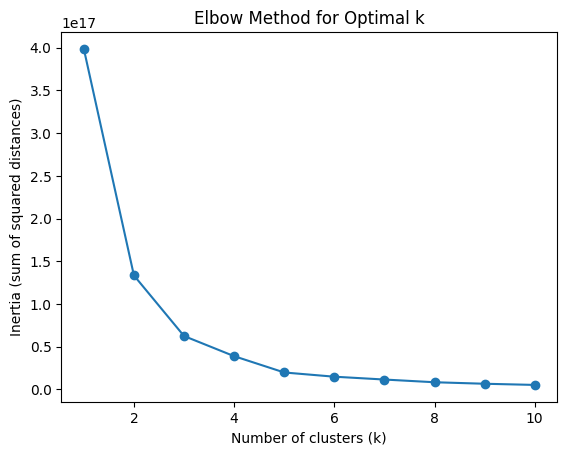

In [858]:
# Plot inertia vs. k
plt.figure()
plt.plot(ks, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (sum of squared distances)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [859]:
# 7. Pick your k (e.g. where the “elbow” appears; say k=3) and fit KMeans
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

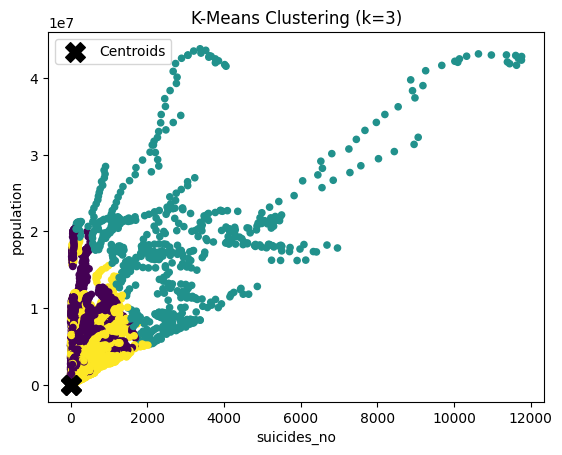

In [860]:
# 9. Visualize clusters on the first two numeric features
feat1, feat2 = X.columns[:2]
plt.figure()
plt.scatter(X[feat1], X[feat2], c=labels, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='X', s=200, c='black', label='Centroids')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title(f"K-Means Clustering (k={optimal_k})")
plt.legend()
plt.show()

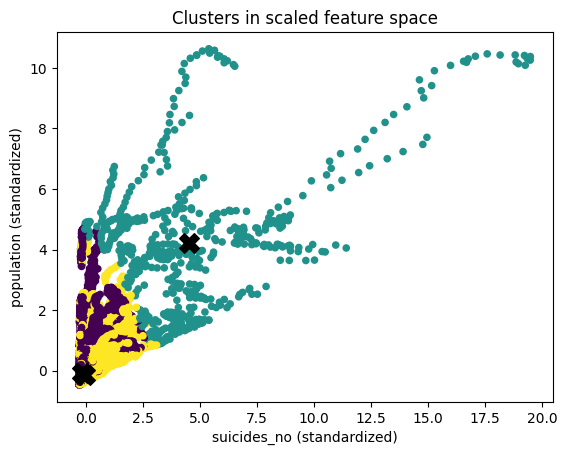

In [861]:
# After scaling:
X2 = X_scaled  # standardized matrix
cent2 = centroids  # in same space

plt.scatter(X2[:,0], X2[:,1], c=labels, s=20)
plt.scatter(cent2[:,0], cent2[:,1], marker='X', s=200, c='black')
plt.xlabel(f"{feat1} (standardized)")
plt.ylabel(f"{feat2} (standardized)")
plt.title("Clusters in scaled feature space")
plt.show()


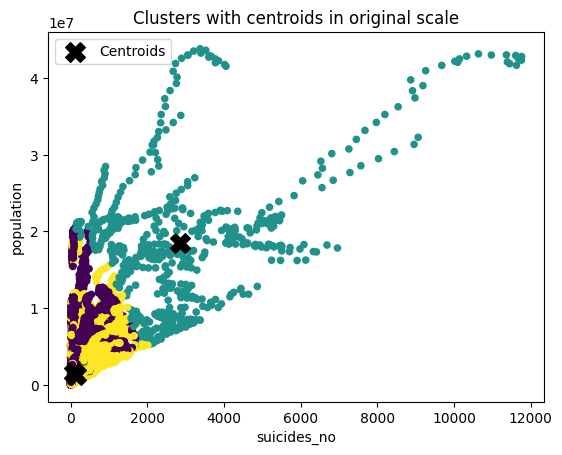

In [862]:
# Assuming you used StandardScaler() as `scaler`:
raw_centroids = scaler.inverse_transform(centroids)

plt.scatter(X[feat1], X[feat2], c=labels, s=20)
plt.scatter(raw_centroids[:,0], raw_centroids[:,1],
            marker='X', s=200, c='black', label='Centroids')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title("Clusters with centroids in original scale")
plt.legend()
plt.show()


In [863]:
# 10. Evaluate your clustering with silhouette score
score = silhouette_score(X, labels)
print(f"Silhouette Score for k={optimal_k}: {score:.3f}")

Silhouette Score for k=3: -0.003


## Cluster Retry

In [864]:
url = "https://raw.githubusercontent.com/LukasRonberg/BIExam/refs/heads/main/data/master.csv"
df = pd.read_csv(url)

In [865]:
# Check the first 5 rows
print(df.head())

# Summary of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check duplicates
print(f"Duplicates: {df.duplicated().sum()}")

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

In [866]:
# Drop columns with high missing values (example: if a column has >50% missing)
df = df.dropna(thresh=0.5*len(df), axis=1)

# Impute numerical columns with median
num_cols = df.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Impute categorical columns with mode (if any)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [867]:
# Identify categorical columns (e.g., 'country', 'sex', 'generation')
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')

In [868]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [869]:
country_counts = df['country'].value_counts(normalize=True)
df['country_freq'] = df['country'].map(country_counts)

In [870]:
cat_cols = df.select_dtypes(include='category').columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Proceed with clustering (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

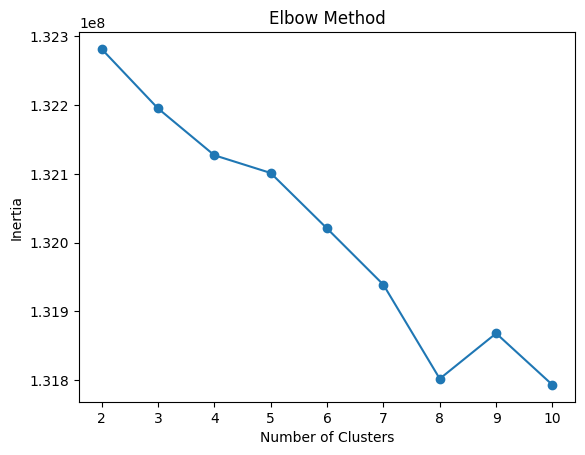

In [871]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

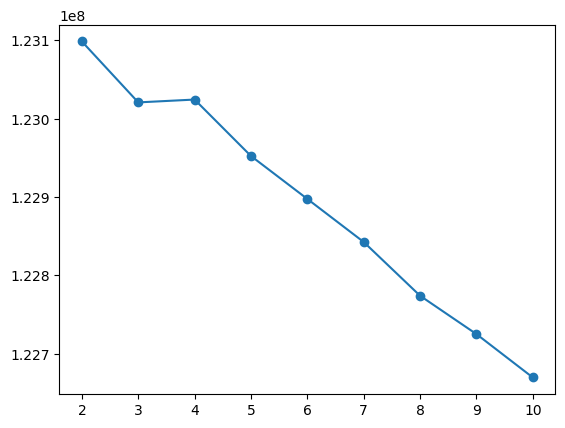

In [872]:
# After cleaning and imputation:
# Frequency encode 'country' and drop it
country_counts = df['country'].value_counts(normalize=True)
df['country_freq'] = df['country'].map(country_counts)
df = df.drop('country', axis=1)

# One-hot encode remaining categorical columns (e.g., 'sex', 'generation')
cat_cols = df.select_dtypes(include='category').columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale and apply PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
pca = PCA(n_components=0.95)
scaled_pca = pca.fit_transform(scaled_data)

# Elbow Method on PCA-transformed data
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.show()